# UK Fisheries Analysis - Part 1

### Table of Contents - TO FINALISE AT THE VERY END once headings are cemented
* [Introduction](#introduction)
* [Importing data libraries](#importing-data-and-libraries)
* [Data Cleaning](#data-cleaning)


## Introduction

This project seeks to analyse data from the UK's fishing industry covering the period 2008-2023, looking primarily at landings data.  The term 'landings' refers to the weight (in tonnes or kg) or value (in £ or £000s) of fish brought to land after being captured at sea.  Data from 2024 has not been included to avoid skewing overall statistics for annual calculations.

While this was originally intended to be completed in one notebook, over the course of writing this notebook, I have decided to split the analysis into two notebooks:
* Part 1 (this notebook): looking primarily at the differences and seasonal/annual variation in species
* Part 2: looking into the different countries landing into the UK and from UK waters to foreign ports. 

The key questions I wanted to answer in this notebook were:

* How do the key species groups contribute to the total landings by weight and value?
* Which species have the greatest landings by weight and value?
* How did price vary over time?
* How did the landings vary over time - both across and within years?

## Importing data and libraries
Firstly, let's import the libraries that we will need to run this analysis.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

Then let's import the data - normally I much prefer smaller and more consistent filenames, but I decided to keep them as they were labelled on the government website just in case I or anyone else want to track them down in the future, so they could know they were using the same files.  This is with the exception of 2020, which I took from a longer dataset (2016-2020) which as a result was labelled differently.

In [2]:
# Load the data
data_2008 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2008.csv', encoding='unicode_escape')
data_2009 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2009.csv', encoding='unicode_escape')
data_2010 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2010.csv', encoding='unicode_escape')
data_2011 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2011.csv', encoding='unicode_escape')
data_2012 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2012.csv', encoding='unicode_escape')
data_2013 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2013.csv', encoding='unicode_escape')
data_2014 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2014.csv', encoding='unicode_escape')
data_2015 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2015.csv', encoding='unicode_escape')
data_2016 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2016.csv', encoding='unicode_escape')
data_2017 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2017.csv', encoding='unicode_escape')
data_2018 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2018.csv', encoding='unicode_escape')
data_2019 = pd.read_csv('./data/UK_fleet_landings_and_foreign_fleet_landings_into_the_UK_by_port_2019.csv', encoding='unicode_escape')
data_2020 = pd.read_csv('./data/UK_and_foreign_landings_by_port_2020.csv', encoding='unicode_escape')
data_2021 = pd.read_csv('./data/Provisional_Dataset_UK_and_Foreign_Vessels_landings_by_UK_port_and_UK_vessel_landings_abroad_2021__year_to_date_.csv', encoding='unicode_escape')
data_2022 = pd.read_csv('./data/Provisional_Dataset_UK_and_Foreign_Vessels_landings_by_UK_port_and_UK_vessel_landings_abroad_2022__year_to_date_.csv', encoding='unicode_escape')
data_2023 = pd.read_csv('./data/Provisional_Dataset_UK_and_Foreign_Vessels_landings_by_UK_port_and_UK_vessel_landings_abroad_2023_year_to_date_new_1.csv', encoding='unicode_escape')

# Then merge the dataframes into one large dataframe to make it easier to handle
all_data = data_2008.merge(data_2009, how = 'outer').merge(data_2010, how = 'outer'). \
    merge(data_2011, how = 'outer').merge(data_2012, how = 'outer').merge(data_2013, how = 'outer'). \
    merge(data_2014, how = 'outer').merge(data_2015, how = 'outer').merge(data_2016, how = 'outer'). \
    merge(data_2017, how = 'outer').merge(data_2018, how = 'outer').merge(data_2019, how = 'outer'). \
    merge(data_2020, how = 'outer').merge(data_2021, how = 'outer').merge(data_2022, how = 'outer'). \
    merge(data_2023, how = 'outer')


## Data Cleaning
Great - now the data is combined into one large dataset, let's get an idea of what it looks like (I'm also doing this visually in the VS Code extension Data Wrangler, but it doesn't hurt to see the stats displayed here too).

In [3]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261369 entries, 0 to 1261368
Data columns (total 18 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Year                           1261369 non-null  int64  
 1   Month                          1261369 non-null  int64  
 2   Port of Landing                1261369 non-null  object 
 3   Port Nationality               1261369 non-null  object 
 4   Vessel Nationality             1261369 non-null  object 
 5   Length Group                   1261369 non-null  object 
 6   Gear Category                  1261369 non-null  object 
 7   Species                        988966 non-null   object 
 8   Species Group                  1261351 non-null  object 
 9   Live Weight (tonnes)           1261369 non-null  float64
 10  Landed Weight (tonnes)         1261369 non-null  float64
 11  Value (£)                      1261365 non-null  float64
 12  Species Code  

Wow - what a dataset, we have over 1.25 million rows in this table!  I can see plenty of columns that contain information I'm keen to start looking at.  I can also see a fair few missing data points from some columns of interest.  I'll need to rectify this before I can get stuck into the analysis, so let's tidy up this dataset a bit.


### Removing unnecessary columns
Most of these columns will be of interest throughout this analysis, but I can already see a few that I know I'm not going to use.  As this dataset is so big, I'm going to remove these upfront.

In [51]:
all_data.drop(columns=['Change Live Weight (tonnes)', \
                       'Change Landed Weight (tonnes)',\
                        'Change Value (£000s)',\
                        'Live Weight (tonnes)',\
                        'Value (£000s)'],\
                         inplace=True)

KeyError: "['Change Live Weight (tonnes)', 'Change Landed Weight (tonnes)', 'Change Value (£000s)', 'Live Weight (tonnes)', 'Value (£000s)'] not found in axis"

### Rename columns
Next up I'm going to rename the columns to make them easier to handle and code for later on.

In [5]:
all_data.rename(columns = {'Year':'year',\
                           'Month':'month',\
                           'Port of Landing': 'port_landing',\
                           'Port Nationality': 'port_nationality',\
                           'Vessel Nationality': 'vessel_nationality',\
                           'Length Group': 'vessel_length',\
                           'Gear Category': 'gear_cat',\
                           'Species': 'species_broad',\
                           'Species Group': 'species_group',\
                           'Landed Weight (tonnes)': 'weight_tonnes',\
                           'Value (£)': 'value',\
                           'Species Code': 'species_code',\
                           'Species Name': 'species_name'},inplace = True)

Finally, let's take a look at how the dataframe looks now after those changes.

In [6]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261369 entries, 0 to 1261368
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   year                1261369 non-null  int64  
 1   month               1261369 non-null  int64  
 2   port_landing        1261369 non-null  object 
 3   port_nationality    1261369 non-null  object 
 4   vessel_nationality  1261369 non-null  object 
 5   vessel_length       1261369 non-null  object 
 6   gear_cat            1261369 non-null  object 
 7   species_broad       988966 non-null   object 
 8   species_group       1261351 non-null  object 
 9   weight_tonnes       1261369 non-null  float64
 10  value               1261365 non-null  float64
 11  species_code        1192602 non-null  object 
 12  species_name        1192602 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 125.1+ MB
None


Great - I'm a lot happier with how this looks.  I can see I've only got the columns I need, and the naming will be much easier to code in later on.  Next up let's look at filling in some of the missing and erroneous data.


### Column name discrepancies
A look in Data Wrangler shows me that different years of data have variations on species column names i.e. 'species', 'species group', 'species as included in publication', 'species as included in publication tables' etc.  After mapping them across to one another and making some changes to the column labels manually, I decided to standardise across the study period and where possible include (in order of level of detail):

* __species_name__ (goes to the greatest level of detail in this dataset i.e. 'Crabs - Velvet (Swim))
* __species_broad__ (goes to the second greatest level of detail i.e. 'Crabs')
* __species_code__ (a three-letter code that corresponds to 'species_broad' i.e. 'CRE')
* __species_group__ (the lowest level of detail in this dataset i.e. 'Shellfish')

My preference would be to use the highest level of detail possible that can be gleaned for all years.  However, 2008 only includes the data to the level of 'species_broad', so I'll use that across all years for most of the analysis, and will fill in all rows for species_group too.

In [7]:
# Create a cross-reference table
codes_names = all_data[['species_code', 'species_name', 'species_broad','species_group']]
codes_names = codes_names.drop_duplicates().dropna()

## A couple of manual additions
# For 2021, the species_code for red mullet was incorrectly recorded as 'MUT', it should be 'MUR', the line below replaces these values:
all_data['species_code'] = all_data['species_code'].replace('MUT', 'MUR')

# One species (Aesop shrimp) doesn't have a species_broad value included at all - so I am adding this in manually:
missing_entry = pd.DataFrame({'species_code': ['AES'], \
                              'species_name': ['Aesop shrimp'],\
                              'species_broad': ['Shrimps and Prawns']})

# Add this missing entry to the codes_names DataFrame
codes_names = pd.concat([codes_names, missing_entry], ignore_index=True)

# Define a function to fill missing 'species_broad' and 'species_group' values based on 'species_code'
def fill_species_columns(row, codes_names):
    # Check if 'species_broad' is missing and try to fill it
    if pd.isna(row['species_broad']):
        species_code = row['species_code']
        species_broad = codes_names.loc[codes_names['species_code'] == species_code, 'species_broad']
        if not species_broad.empty:
            row['species_broad'] = species_broad.values[0]  # Fill 'species_broad'
    
    # Check if 'species_group' is missing and try to fill it
    if pd.isna(row['species_group']):
        species_code = row['species_code']
        species_group = codes_names.loc[codes_names['species_code'] == species_code, 'species_group']
        if not species_group.empty:
            row['species_group'] = species_group.values[0]  # Fill 'species_group'

    return row

# Apply the function to the all_data DataFrame
all_data = all_data.apply(fill_species_columns, axis=1, codes_names=codes_names)

print(f"The number of records missing from the species_broad column is {all_data['species_broad'].isna().sum()}") 
print(f"The number of records missing from the species_group column is {all_data['species_group'].isna().sum()}") 

The number of records missing from the species_broad column is 14
The number of records missing from the species_group column is 1


I now only have 14 records missing a species_broad value and one missing a species_group value.  From a visual check with Data Wrangler, I can see that these are very unusual species that I believe to have been caught as by-catch.  They include things like sharks, lanternfish and jellyfish.  As there are so few of these and they are small values that will have a negligible impact on the overall data, I'm going to delete these lines.

In [8]:
# Remove rows where 'species_group' or 'species_broad' is empty
all_data = all_data.dropna(subset=['species_group', 'species_broad'])

I also can see that there are some discrepancies in the values of the species_broad column when it comes to capitalisation, so I will tidy that up next.

In [9]:
all_data['species_broad'] = all_data['species_broad'].replace({'Other Shellfish': 'Other Shellfish', 'Other shellfish': 'Other Shellfish'})
all_data['species_broad'] = all_data['species_broad'].replace({'Other Demersal': 'Other Demersal', 'Other demersal': 'Other Demersal'})
all_data['species_broad'] = all_data['species_broad'].replace({'Other Pelagic': 'Other Pelagic', 'Other pelagic': 'Other Pelagic'})

# # Print the values to check I've removed all doubles
# print(sorted(all_data.species_broad.unique()))

### Country name and code discrepancies
Next up is the codes and names given to countries, which changed formats a few times through the study period.  As an example, England was originally being recorded as 'GBE', but this changed to 'UK - England' in 2009.  

First, let's determine the values that are used, then we can make them consistent throughout the entire time series.

In [10]:
country_names = all_data['port_nationality'].unique()
country_names

array(['GBW', 'GBS', 'GBE', 'GBN', 'ESP', 'IRL', 'FRA', 'MAR', 'NLD',
       'NOR', 'DNK', 'GBC', 'FLK', 'NAM', 'DEU', 'ZAF', 'URY', 'MAU',
       'UNK', 'GBI', 'BEL', 'UK - Wales', 'UK - Scotland', 'UK - England',
       'Norway', 'UK - Northern Ireland', 'Ireland', 'France', 'Spain',
       'UK - Isle of Man', 'Netherlands', 'Denmark', 'Mauritius',
       'Belgium', 'Namibia', 'South Africa', 'Germany',
       'UK - Channel Islands', 'Morocco', 'Iceland', 'Unknown',
       'Faeroe Islands', 'Greenland', 'Indonesia', 'Falkland Islands',
       'Brazil', 'Canada', 'Gabon', 'Channel Islands', 'Isle of Man'],
      dtype=object)

And again for the 'vessel_nationality' column.

In [11]:
country_names_vessels = all_data['vessel_nationality'].unique()
country_names_vessels

array(['GBW', 'GBS', 'NLD', 'GBE', 'GBN', 'IRL', 'GBG', 'GBJ', 'DNK',
       'BEL', 'ESP', 'FRA', 'FRO', 'GBI', 'NOR', 'DEU', 'ISL', 'GBR',
       'RUS', 'SWE', 'UK - Wales', 'Netherlands', 'UK - England',
       'UK - Scotland', 'UK - Northern Ireland', 'Ireland', 'Belgium',
       'UK - Guernsey', 'UK - Jersey', 'UK - Isle of Man', 'Denmark',
       'France', 'Spain', 'Faeroe Islands', 'Norway', 'Russia', 'Unknown',
       'Iceland', 'Germany', 'Belize', 'Sweden', 'Guernsey',
       'Isle of Man', 'Jersey'], dtype=object)

Some of these codes are obvious as to which country they are referring to, others less so.  From looking at these codes within 'data_2008', I was able to find out the port that was being landed into and confirm the countries.  So the next step is to convert all codes to consistent country names.

In [12]:
# First, create a mapping dictionary for country codes to full country names
country_mapping = {
    'GBW': 'UK - Wales',
    'GBC': 'UK - Jersey',
    'GBS': 'UK - Scotland',
    'GBE': 'UK - England',
    'GBN': 'UK - Northern Ireland',
    'GBG': 'UK - Guernsey',
    'GBJ': 'UK - Jersey',
    'GBI': 'UK - Isle of Man',
    'GBR': 'UK',
    'NLD': 'Netherlands',
    'IRL': 'Ireland',
    'DNK': 'Denmark',
    'BEL': 'Belgium',
    'ESP': 'Spain',
    'FLK': 'Falklands',
    'FRA': 'France',
    'FRO': 'Faeroe Islands',
    'MAR': 'Morocco',
    'MAU': 'Mauritius',
    'NAM': 'Namibia',
    'NOR': 'Norway',
    'DEU': 'Germany',
    'ISL': 'Iceland',
    'RUS': 'Russia',
    'SWE': 'Sweden',
    'BEL': 'Belgium',
    'BLZ': 'Belize',
    'ZAF': 'South Africa',
    'UNK': 'Unknown',
    'URY': 'Uruguay',
    'Channel Islands': 'UK - Channel Islands',
    'Isle of Wight': 'UK - Isle of Wight',
    'Isle of Man': 'UK - Isle of Man',
    'Guernsey': 'UK - Channel Islands',
    'Jersey': 'UK - Channel Islands',
    'UK Guernsey': 'UK - Channel Islands',
    'UK Jersey': 'UK - Channel Islands'
}

# Use .replace() to update the column values in the dataframe
all_data['port_nationality'] = all_data['port_nationality'].replace(country_mapping)
all_data['vessel_nationality'] = all_data['vessel_nationality'].replace(country_mapping)

# Visual check that the categories have all been made consistent: 
# country_names = all_data['port_nationality'].unique()
# country_names

# country_names_vessels = all_data['vessel_nationality'].unique()
# country_names_vessels

### Add in new columns for analysis
I'm adding in three new columns that I can use in analysis and plotting further down:

* __Value in £000s__: As some of the monetary values are really large, I'm going to add a new column of 000s of pounds.  While there was a column like this before, it had only been calculated for a few years, so this re-calculates this value for every row.
* __£ per tonne__: This calculates the value per tonne for different species to allow me to compare this later on.
* __£ per kg__: As the £ per tonne is going to be large and hard to read in my plots, I'm dividing this by 1000 to give more manageable numbers.

In [13]:
# Divide value by weight to get £ per tonne
all_data.loc[:,'GBP_per_tonne'] = all_data['value'] / all_data['weight_tonnes']

# Replace 'inf' values with NaN so they can be ignored in calculations (otherwise they cause a lot of missing values down the line)
all_data.loc[:,'GBP_per_tonne'] = all_data['GBP_per_tonne'].replace([np.inf, -np.inf], np.nan)

# Create GBP per kg and value (in 000s) for some more manageable values
all_data.loc[:,'GBP_per_kg'] = all_data['GBP_per_tonne']/1000
all_data.loc[:,'value_000s'] = all_data['value']/1000

### Removal of incorrect weight and monetary values
While the data is now in the appropriate columns, I can see that some of the data entries have a negative value recorded against the tonnes and GBP of landings.  Obviously this isn't possible, and I'm unsure of the reason as for the error in these lines.  As a result, I need to perform listwise deletion to remove the entire observation for each where the value is negative.  

As there are not many, I am not concerned about the overall impact to the data (there's no hard and fast rule, but in general, under 5% loss is considered to be acceptable). First I'll check what percentage of values will be deleted.

In [14]:
negative_count = (all_data['value'] < 0).sum() + (all_data['weight_tonnes'] < 0).sum()
print(negative_count)

# Ask for a printed message to let me know the % of data being deleted
negative_pc = (negative_count/len(all_data))*100
print('The percentage of data that will be deleted by removing observations with a negative landing weight or monetary value is',str(round(negative_pc,4)),'%')

17
The percentage of data that will be deleted by removing observations with a negative landing weight or monetary value is 0.0013 %


Now I know that the number of lines is well below 5%, the next step is to remove any rows that have a negative landing value.

In [52]:
# Define the columns to check for negative values
columns_to_check = ['weight_tonnes', 'value']

# Filter rows where all values in the specified columns are non-negative
all_data = all_data.loc[(all_data[columns_to_check] >= 0).all(axis=1)]

# Do a check for how many negative values remain
negative_count = (all_data['value'] < 0).sum() + (all_data['weight_tonnes'] < 0).sum()
print(negative_count)

0


Next up, there were a couple of datapoints that were roughly 1000 times the expected value when it came to GBP per kg.  There was one datapoint for Mackerel which showed a value per kg of over £8,000 while they were typically around £7-8, and one for haddock at over £2,000 compared to around £2/kg. 

Both of these look almost certainly like an error in data input.  However, rather than assuming this and remedying the datapoint itself, I'm going to remove the datapoints altogether using listwise deletion as it heavily impacts the annual price per kg for the respective year.

In [16]:
# Define the columns to check for incorrect values
column_to_check = ['GBP_per_kg']

# Remove rows where 'species_broad' is 'Mackerel'/'Haddock and values in the specified columns are above 8000/2000
all_data = all_data.loc[~((all_data['species_broad'] == 'Mackerel') & (all_data[column_to_check] > 8000).all(axis=1))]
all_data = all_data.loc[~((all_data['species_broad'] == 'Haddock')  & (all_data[column_to_check] > 2000).all(axis=1))]

## Data Analysis
Now the data has been tidied and errors removed, we can get on with plotting up some of the data to see what it can tell us.

First up, I'm going to create a dataframe that has the aggregated stats by species for the whole time series, then a dataframe with those stats grouped by year, then another by month.  These dataframes can then be used for the various analyses that I'll be completing.  After I've done this, I'll jump straight into the questions I listed in the introduction.

In [17]:
# Create a new dataframe with aggregate stats for each species_broad value
species_stats_alltime = all_data.groupby('species_broad').agg({
    'value': ['sum', 'mean'],
    'value_000s': ['sum','mean'],
    'weight_tonnes': ['sum', 'mean'],
    'GBP_per_tonne': ['mean'],
    'GBP_per_kg': ['mean']    
}).reset_index()

# Rename columns for clarity
species_stats_alltime.columns = 'species_broad','total_value',\
                                'average_value','total_value_000s',\
                                'average_value_000s','total_weight',\
                                'average_weight','average_GBP_per_tonne',\
                                'average_GBP_per_kg'

# Next up, let's calculate these stats by year
species_stats_annual = all_data.groupby(['year','species_broad']).agg({
    'value': ['sum', 'mean'],
    'value_000s': ['sum','mean'],
    'weight_tonnes': ['sum', 'mean'],
    'GBP_per_tonne': ['mean'],
    'GBP_per_kg': ['mean']  
}).reset_index()

# Rename the columns for clarity/ease
species_stats_annual.columns = 'year','species_broad',\
                                'total_value','average_value',\
                                'total_value_000s','average_value_000s',\
                                'total_weight','average_weight',\
                                'average_GBP_per_tonne','average_GBP_per_kg'

# Then calculate by month
species_stats_monthly = all_data.groupby(['year','month','species_broad']).agg({
    'value': ['sum', 'mean'],
    'value_000s': ['sum','mean'],
    'weight_tonnes': ['sum', 'mean'],
    'GBP_per_tonne': ['mean'],
    'GBP_per_kg': ['mean']  
}).reset_index()

# Rename the columns for clarity/ease
species_stats_monthly.columns = 'year','month','species_broad',\
                                'total_value','average_value',\
                                'total_value_000s','average_value_000s',\
                                'total_weight','average_weight',\
                                'average_GBP_per_tonne','average_GBP_per_kg'

Great - now we've got dataframes with aggregate stats at various temporal resolutions that we can use for our analysis.

### How do the different species groups contribute to the fishery?
In the dataset, the column titled 'Species Group' has three unique values:
* __Pelagic__ - species caught higher up within the water column such as mackerel and salmon.  These can be caught through a variety of methods, including trawls, nets and rod & line
* __Demersal__ - species that live on or in the seabed and are typically caught through bottom trawling
* __Shellfish__ - typically species such as crabs, nephrops, lobster, caught with a variety of methods including pots (think of the classic lobster pots stacked up in harbours), bottom trawling and dredging.

This is a much simpler way of categorising the species than the species_broad that we will look at later.  As there are only three categories, I'd like to plot these up in a pie chart to see how much each type contributes to the total landed weight and monetary value.  After doing this, I am going to see how each of these three categories have contributed to the total value and weight landed over time.

In [18]:
# Create a new dataframe that groups the data by species_group
species_group_stats_alltime = all_data.groupby('species_group').agg({
    'value': ['sum', 'mean'],
    'value_000s': ['sum','mean'],
    'weight_tonnes': ['sum', 'mean'],
    'GBP_per_tonne': ['mean'],
    'GBP_per_kg': ['mean']    
}).reset_index()

# Rename columns for clarity
species_group_stats_alltime.columns = 'species_group','total_value',\
                                'average_value','total_value_000s',\
                                'average_value_000s','total_weight',\
                                'average_weight','average_GBP_per_tonne',\
                                'average_GBP_per_kg'

# Remove the few lines where there is a value in the species_group column of 'Misc'
species_group_stats_alltime = species_group_stats_alltime[species_group_stats_alltime['species_group'] != 'Misc']

# Next up, let's calculate these stats by year
species_group_stats_annual = all_data.groupby(['year','species_group']).agg({
    'value': ['sum', 'mean'],
    'value_000s': ['sum','mean'],
    'weight_tonnes': ['sum', 'mean'],
    'GBP_per_tonne': ['mean'],
    'GBP_per_kg': ['mean']  
}).reset_index()

# Rename the columns for clarity/ease
species_group_stats_annual.columns = 'year','species_group',\
                                'total_value','average_value',\
                                'total_value_000s','average_value_000s',\
                                'total_weight','average_weight',\
                                'average_GBP_per_tonne','average_GBP_per_kg'

# Remove the few lines where there is a value in the species_group column of 'Misc'
species_group_stats_annual = species_group_stats_annual[species_group_stats_annual['species_group'] != 'Misc']


Now we have our dataframes, let's plot these up.

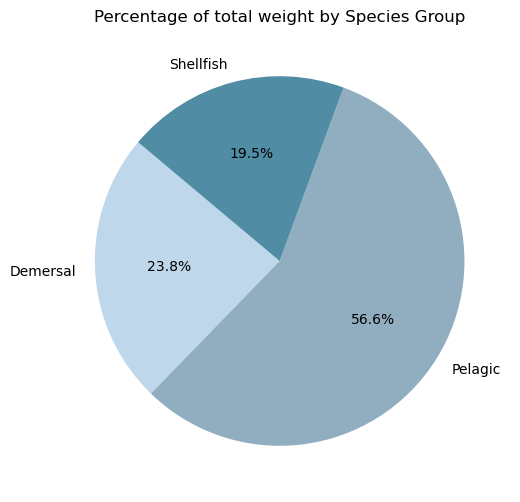

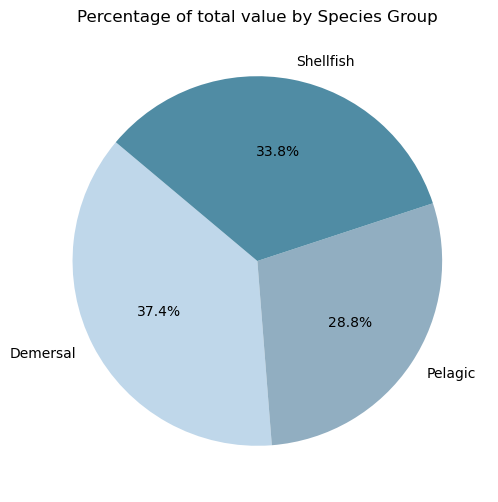

In [19]:
# Function to create pie chart
def create_pie_chart(df, column, title):
    # Extract the labels and values
    labels = df['species_group']
    values = df[column]

    # Set a colour palette
    colors = ['#bfd7ea', '#91AEC1', '#508CA4']

    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors = colors)
    
    # Set the title of the pie chart
    plt.title(title)

    # Display the chart
    plt.show()

# Example usage for 'total_weight'
create_pie_chart(species_group_stats_alltime, 'total_weight', 'Percentage of total weight by Species Group')

# Example usage for 'total_value'
create_pie_chart(species_group_stats_alltime, 'total_value', 'Percentage of total value by Species Group')

From these charts, we can see that by weight, over half of the landings are pelagic species.  This is likely to be hugely influenced my mackerel, as we will see later (spoiler alert) mackerel plays a huge role in the UK's fishery.

When we compare this to the breakdown of landings by value, we can see a considerable shift in the values.  For example, while pelagic species take up 56.6% of landings by weight, they make up only 28.8% of the value.  This will be heavily influenced by the lower price per tonne of species in this category.  Conversely, shellfish make up under 20% of the landings by weight, but nearly 34% of the landings by value.  As lobster falls in this category, and we will see later in the notebook (second spoiler alert) that lobster has the highest price per tonne of all the species listed, this is probably helping to push up the value of this category.

Next up, let's take a look at how the breakdown of species group has varied annually over the study period.

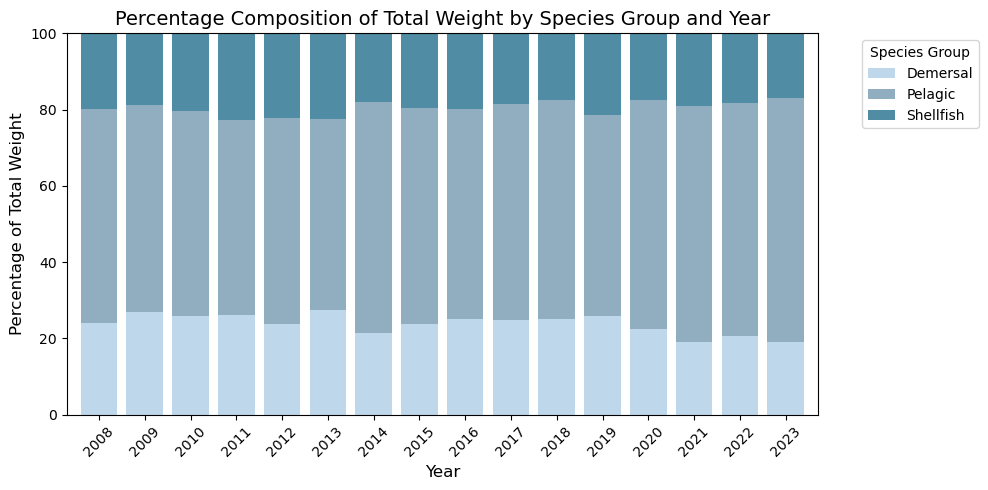

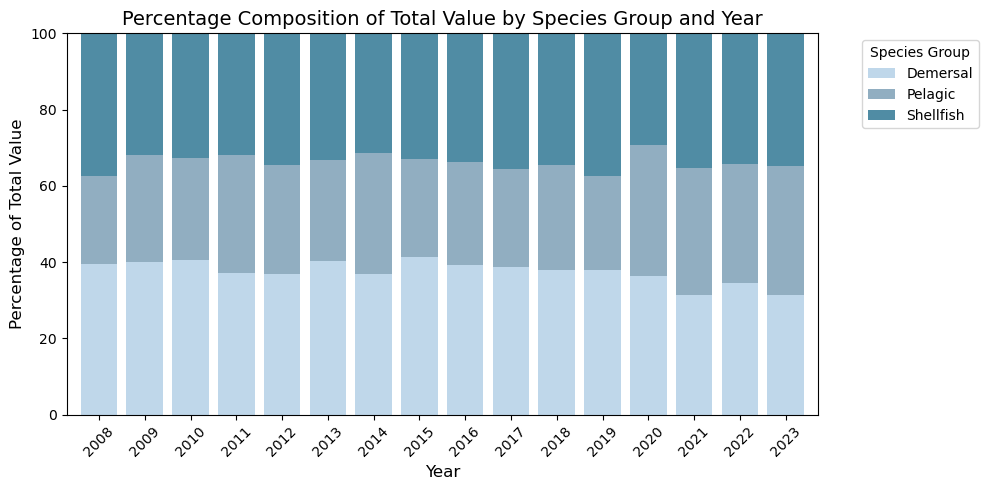

In [20]:
# Function to calculate percentages
def convert_to_percentages(df):
    # Calculate percentages for each row
    return df.div(df.sum(axis=1), axis=0) * 100

# Pivot the data for the total_weight and convert to percentages
pivot_weight = species_group_stats_annual.pivot(index='year', columns='species_group', values='total_weight')
pivot_weight_percent = convert_to_percentages(pivot_weight)

# Pivot the data for the total_value and convert to percentages
pivot_value = species_group_stats_annual.pivot(index='year', columns='species_group', values='total_value')
pivot_value_percent = convert_to_percentages(pivot_value)

# Create a function to create stacked bar chart with percentages
def create_stacked_bar_chart(df, title, ylabel):
    # Get the years and the species groups
    years = df.index
    species_groups = df.columns

    # Initialise the bottom values for stacking (start at 0 for each year)
    bottom_values = [0] * len(years)

    # Define the custom colours used in the pie chart
    colors = ['#bfd7ea', '#91AEC1', '#508CA4']

    # Create a figure
    ax = plt.figure(figsize=(10, 5))

    # Loop through each species_group and stack the bars
    for idx, species in enumerate(species_groups):
        plt.bar(years, df[species], bottom=bottom_values, label=species, color=colors[idx])
        # Update the bottom values to add the current species_group's percentages
        bottom_values += df[species]

    # Add labels, title, and legend
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend(title="Species Group", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(years, rotation=45)
    plt.tight_layout()
    plt.ylim(0, 100)
    plt.xlim(2007.3,2023.7)
    plt.show()

# Stacked bar chart for total weight (in percentages)
create_stacked_bar_chart(pivot_weight_percent, 'Percentage Composition of Total Weight by Species Group', 'Percentage of Total Weight')

# Stacked bar chart for total value (in percentages)
create_stacked_bar_chart(pivot_value_percent, 'Percentage Composition of Total Value by Species Group', 'Percentage of Total Value')

Looking at these two charts of how the species groups contribute to the total weight and value through time, there aren't obvious trends that jump out.  It looks like there may be a slight increase in pelagic catches, and small decreasing trends in shellfish and demersal species groups, but no drastic changes.


### Which species have the greatest landings by weight and value?
As the price per kg can vary substantially by species (something I'll take a closer look at later in this notebook), I'd like to calculate find the top ten species by weight then by monetary value to see how similar these are.  Finally I'll take a look at the top 10 species in terms of GBP per kg.  

There are five species (often referred to as the 'big five') that make up 80% of the seafood that we consume in the UK.  These are cod, haddock, salmon, tuna and prawns.  So I'm expecting to see these feature heavily in the 10 species lists for weight and monetary value.

#### Top 10 species by monetary value

Let's generate a table and a bar chart to better understand these values.

In [21]:
# Sort the species by the total value landed
species_value_sorted = species_stats_alltime.sort_values(by = 'total_value', ascending = False)

# Select the top 10 species
species_value_top_10 = species_value_sorted.head(10).copy()

# Format the numbers when being displayed so they are easier to read
pd.options.display.float_format = '{:,.2f}'.format

species_value_top_10

,species_broad,total_value,average_value,total_value_000s,average_value_000s,total_weight,average_weight,average_GBP_per_tonne,average_GBP_per_kg
23,Mackerel,"3,254,663,304.52","122,295.99","3,254,663.30",122.30,"3,410,713.95",128.16,"1,753.60",1.75
27,Nephrops,"1,596,125,265.25","36,610.06","1,596,125.27",36.61,"325,927.04",7.48,"6,564.10",6.56
40,Scallops,"978,888,144.91","25,041.27","978,888.14",25.04,"601,817.54",15.40,"2,336.11",2.34
5,Cod,"896,296,900.18","20,443.80","896,296.90",20.44,"312,201.49",7.12,"2,641.55",2.64
25,Monks or Anglers,"885,740,167.95","25,491.86","885,740.17",25.49,"206,064.86",5.93,"5,582.64",5.58
7,Crabs,"851,127,128.83","6,088.53","851,127.13",6.09,"492,032.91",3.52,"1,930.71",1.93
14,Haddock,"697,798,740.77","31,594.62","697,798.74",31.59,"489,985.68",22.19,"1,520.51",1.52
18,Herring,"659,147,703.23","76,591.65","659,147.70",76.59,"1,453,219.62",168.86,"1,017.13",1.02
22,Lobsters,"609,492,957.24","6,626.80","609,492.96",6.63,"49,927.71",0.54,"13,182.51",13.18
15,Hake,"526,588,719.12","26,902.46","526,588.72",26.90,"213,527.95",10.91,"2,025.86",2.03



I'll save these species_names as a list that I'll use for plotting purposes later on.

In [22]:
species_value_top_10_list = species_value_top_10.species_broad.tolist()

Next up is the bar chart.

/var/folders/hl/n0654x5j7dd12gd927mvx03r0000gn/T/ipykernel_3730/2598672544.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])  # Format them with commas


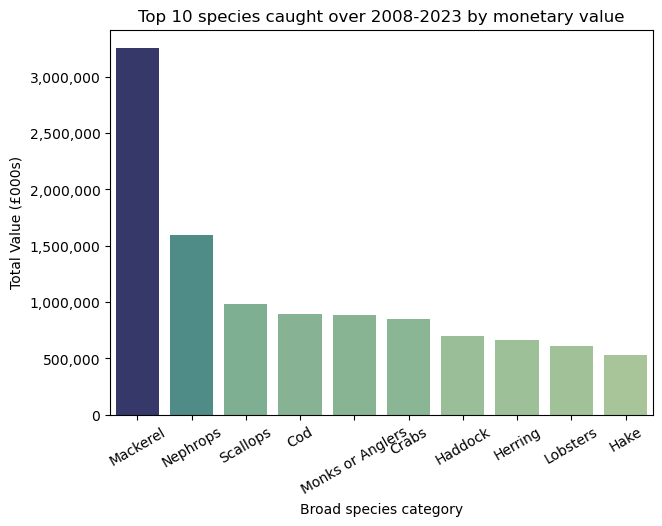

<Figure size 640x480 with 0 Axes>

In [23]:
# Set figure size
fig = plt.figure(figsize =(7, 5))

# Create the plot, setting the colour to change as the value changes
ax = sns.barplot(species_value_top_10, x = 'species_broad', y = 'total_value_000s', \
                 hue = 'total_value_000s', palette = 'crest', legend = False)
ax.set(ylabel = 'Total Value (£000s)', xlabel = 'Broad species category',\
                 title = 'Top 10 species caught over 2008-2023 by monetary value')

# Format the y-axis values with commas and no scientific notation
y_vals = ax.get_yticks()  # Get the y-axis tick positions
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])  # Format them with commas

# Show the plot
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()

# Clear the plot
plt.clf()

Holy mackerel, that's a lot of mackerel!  This table tells us that over the study period, mackerel landings totalled to £3 billion (note that the units in the bar chart above are in £000s).  While the table was great at giving us detail, seeing the bar chart really helps to illuminate the stark difference between mackerel and the other species.

I'd be interested to see where these are being landed most frequently, as from a quick visual check it looks like there are certain ports which seem to be hotspots that land a lot of mackerel.  I'll save that for the part 2 of this notebook.  First, I'd like to see what percentage of the total UK fishing value landed is from mackerel.

In [24]:
# Filter the dataframe for rows where species_broad is "Mackerel"
mackerel_data = all_data[all_data['species_broad'] == 'Mackerel']
mackerel_value = mackerel_data['value'].sum() # Sum the total value for mackerel rows
overall_value = all_data['value'].sum() # Sum the total value for all rows

# Calculate the percentage of the total value from mackerel
mackerel_percentage = (mackerel_value / overall_value) * 100

# Print the result
print(f"Percentage of total UK fishery value from mackerel: {mackerel_percentage:.2f}%")

Percentage of total UK fishery value from mackerel: 21.99%


Wow - so over the study period, mackerel contributed over 20% of the total value to the UK's fishing industry, that's huge!  Considering these aren't on the 'big five' list, I wonder if much of this is then exported rather than being eaten in the UK.

The next species on the top 10 list is nephrops (also known as langoustine).  I believe the vast majority of these are caught in Scotland, so Part 2 looking at geographical variation will be interesting to see.

The remaining species on the graph are all much closer in value to one another than mackerel and nephrops, sitting within a range of £0.5-1 billion in total.

While I was expecting to see all of the 'big five' species, only cod and haddock feature on this list.  The reason for salmon not featuring here may be down to the fact that much of the salmon we consume now comes from aquaculture (fish farms), which is recorded separately from the wild caught fish represented by this dataset.  While salmon does feature in the data, the amount of wild caught salmon is nowhere near big enough to be in the top 10.  

For tuna and prawns, I suspect this may be because the majority of these are being imported from other countries, and therefore are not recorded as part of this dataset.

#### Top 10 species by weight
Now we've had a look at the top 10 species by monetary value, let's examine the top 10 species landed by weight and see how these two lists compare.  Again, I'll pull together a table and a bar chart to show detail and give some visualisation.

In [25]:
# Sort the species by the total value landed and select top 10
species_weight_sorted = species_stats_alltime.sort_values(by = 'total_weight', ascending = False)
species_weight_top_10 = species_weight_sorted.head(10)

# Turn the species into a list for later use
species_weight_top_10_list = species_weight_top_10.species_broad.tolist()

species_weight_top_10

,species_broad,total_value,average_value,total_value_000s,average_value_000s,total_weight,average_weight,average_GBP_per_tonne,average_GBP_per_kg
23,Mackerel,"3,254,663,304.52","122,295.99","3,254,663.30",122.30,"3,410,713.95",128.16,"1,753.60",1.75
18,Herring,"659,147,703.23","76,591.65","659,147.70",76.59,"1,453,219.62",168.86,"1,017.13",1.02
1,Blue Whiting,"174,096,170.40","503,168.12","174,096.17",503.17,"769,437.11","2,223.81",267.60,0.27
40,Scallops,"978,888,144.91","25,041.27","978,888.14",25.04,"601,817.54",15.40,"2,336.11",2.34
7,Crabs,"851,127,128.83","6,088.53","851,127.13",6.09,"492,032.91",3.52,"1,930.71",1.93
14,Haddock,"697,798,740.77","31,594.62","697,798.74",31.59,"489,985.68",22.19,"1,520.51",1.52
27,Nephrops,"1,596,125,265.25","36,610.06","1,596,125.27",36.61,"325,927.04",7.48,"6,564.10",6.56
5,Cod,"896,296,900.18","20,443.80","896,296.90",20.44,"312,201.49",7.12,"2,641.55",2.64
49,Whelks,"276,327,465.62","11,833.14","276,327.47",11.83,"287,044.07",12.29,995.21,1.00
37,Saithe,"282,229,138.21","22,986.57","282,229.14",22.99,"252,775.79",20.59,"1,199.44",1.20


/var/folders/hl/n0654x5j7dd12gd927mvx03r0000gn/T/ipykernel_3730/343388668.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])  # Format them with commas


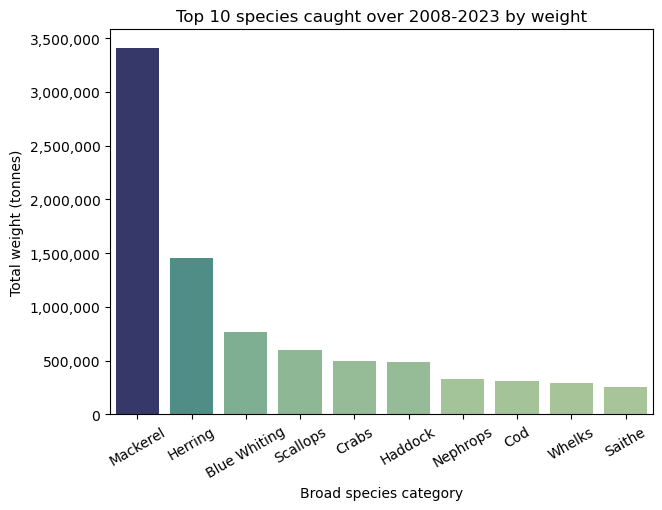

<Figure size 640x480 with 0 Axes>

In [26]:
# Set figure size
fig = plt.figure(figsize =(7, 5))

# Create the plot, setting the colour to change as the value changes
ax = sns.barplot(species_weight_top_10, x = 'species_broad', y = 'total_weight', hue = 'total_weight', palette = 'crest', legend = False)
ax.set(ylabel = 'Total weight (tonnes)', xlabel = 'Broad species category',title = 'Top 10 species caught over 2008-2023 by weight')

# Format the y-axis values with commas and no scientific notation
y_vals = ax.get_yticks()  # Get the y-axis tick positions
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])  # Format them with commas

# Show the plot
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()
plt.clf()

Again mackerel takes the number one spot by a substantial margin.  A notable difference is that the other species in this list are slightly different from the previous list.  For example, monks & anglers, lobsters and haddock no longer feature, and instead we have blue whiting, whelks and saithe (also known as pollock).  

The presence of the latter three species in this top 10 list but not the previous suggests that they fetch a relatively low value per kg.   This is supported by the fact that blue whiting is predominantly used for fish feed and fish oil, saithe has a darker flesh which can fetch it a lower price and is also often used for cat food.

To examine the relationship between these two lists a bit better, let's take a look at which species fetch the highest price per kg.

#### Top 10 species by GBP per kg
_Note: these prices look low upon converting into £ per kg.  After doing some digging, this is true to the data rather than a calculation error within this notebook.  As it is so cheap, I suspect this may be the price as it is sold to merchants - but I've been unable to clarify if this is the case._

As we did for the previous two lists, we let's pull together a table and a bar chart.  This time, I'm also going to look at the bottom 10 (the 10 cheapest species per kg) to see if any of those I just discussed are in there.

In [27]:
# Sort the species by the total value landed
sorted_species_pricepertonne_agg = species_stats_alltime.sort_values(by = 'average_GBP_per_tonne', ascending = False)
sorted_reverse_species_pricepertonne_agg = species_stats_alltime.sort_values(by = 'average_GBP_per_tonne', ascending = True)

# Select the top & bottom 10 species
top_10_species_pricepertonne_agg = sorted_species_pricepertonne_agg.head(10).copy()
bottom_10_species_pricepertonne_agg = sorted_reverse_species_pricepertonne_agg.head(10).copy()

top_10_species_names_by_GBPperkg = top_10_species_pricepertonne_agg.species_broad.tolist()
bottom_10_species_names_by_GBPperkg = bottom_10_species_pricepertonne_agg.species_broad.tolist()

# Format the numbers when being displayed so they are easier to read
pd.options.display.float_format = '{:,.2f}'.format

top_10_species_pricepertonne_agg

,species_broad,total_value,average_value,total_value_000s,average_value_000s,total_weight,average_weight,average_GBP_per_tonne,average_GBP_per_kg
22,Lobsters,"609,492,957.24","6,626.80","609,492.96",6.63,"49,927.71",0.54,"13,182.51",13.18
41,Shrimps and Prawns,"41,903,689.56","11,659.35","41,903.69",11.66,"17,403.14",4.84,"10,894.38",10.89
31,Other Shellfish,"101,432,615.93","4,343.64","101,432.62",4.34,"26,690.61",1.14,"10,577.42",10.58
48,Turbot,"110,707,684.69","3,101.49","110,707.68",3.10,"11,974.30",0.34,"9,272.45",9.27
16,Halibut,"21,355,440.27","2,793.39","21,355.44",2.79,"2,630.54",0.34,"8,764.08",8.76
0,Bass,"87,208,374.63","2,392.22","87,208.37",2.39,"10,887.43",0.30,"8,468.14",8.47
43,Sole,"396,073,027.70","8,668.32","396,073.03",8.67,"42,213.75",0.92,"8,334.66",8.33
27,Nephrops,"1,596,125,265.25","36,610.06","1,596,125.27",36.61,"325,927.04",7.48,"6,564.10",6.56
2,Brill,"42,532,985.78","1,312.54","42,532.99",1.31,"6,615.53",0.20,"6,113.54",6.11
25,Monks or Anglers,"885,740,167.95","25,491.86","885,740.17",25.49,"206,064.86",5.93,"5,582.64",5.58


/var/folders/hl/n0654x5j7dd12gd927mvx03r0000gn/T/ipykernel_3730/3736924493.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])  # Format them with commas


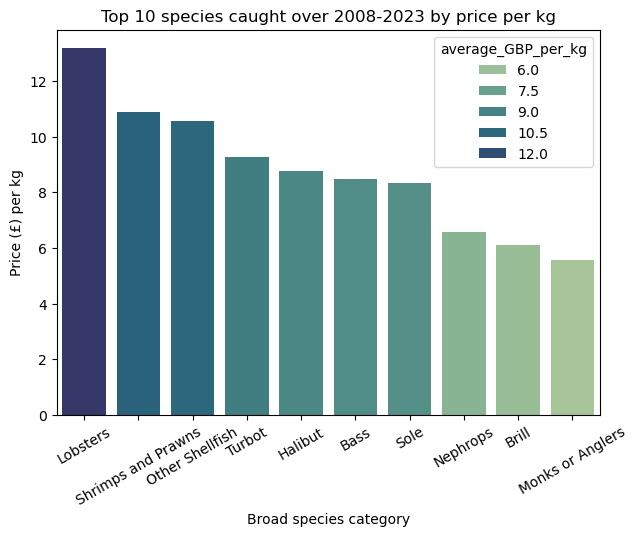

<Figure size 640x480 with 0 Axes>

In [28]:
# Set figure size
fig = plt.figure(figsize =(7, 5))

# Create the plot, setting the colour to change as the value changes
ax = sns.barplot(top_10_species_pricepertonne_agg, x = 'species_broad', y = 'average_GBP_per_kg', hue = 'average_GBP_per_kg', palette = 'crest', legend = True)
ax.set(ylabel = 'Price (£) per kg', xlabel = 'Broad species category',title = 'Top 10 species caught over 2008-2023 by price per kg')

# Format the y-axis values with commas and no scientific notation
y_vals = ax.get_yticks()  # Get the y-axis tick positions
ax.set_yticklabels(['{:,.0f}'.format(y) for y in y_vals])  # Format them with commas

# Show the plot
plt.xticks(rotation=30)  # Rotate x-axis labels for better readability
plt.show()
plt.clf()

The table and bar chart show lobster fetched the highest average price per kg over the study period, followed by shrimps &prawns and the 'Other Shellfish' category.  More on 'Other Shellfish' in a moment, but for now let's have a quick look at the other species listed in this chart.  

Of the fish species, turbot, halibut, sole and brill are all flatfish.  Halibut and sole are both suffering the effects of overfishing, which could contribute to their higher prices.  Bass stock underwent a huge depletion in stock size in around 2010, with heavy restrictions placed by both the EU and UK in 2015 to try and manage this.  While stocks are showing a recovery, it's likely to take some time to get back to pre-2010 levels and the price may be influenced by the limited availability of this fish.

_Note: for some species, price can vary considerably depending on how it has been caught.  For example, scallops (while not in this plot) can vary in price substantially based on whether they were caught via dredging or hand diving.  Dredging is indiscriminate - it pulls up anything on the seabed where the dredge is towed and many scallops (plus all the bycatch) can be caught in one fishing trip.  Conversely, hand diving (as the name suggests) involves a diver going down and selecting the scallops off the seafloor by hand.  A far smaller environmental footprint but more labour intensive, therefore fetching higher prices (and rightly so).  When consuming scallops, it is relatively pretty black and white which method of fishing one should be asking for when ordering/sourcing.  If it's dredged, it's worth knowing that the environmental impact (and carbon footprint) of this method of fishing is enormous._

_Ok, I may have got side-tracked by scallops, it happens.  Back to business._

Back to our 'Other Shellfish' category.  From a look at the data, this includes species such as octopus, clams, crawfish (similar to lobster) and some prawn species, (which should really be classified under the shrimps and prawns category).  Many lines of the data with this 'species broad' classification are missing a species name, but of those that do have values, octopus is the most commonly recorded species listed under this category.  Let's do a little digging to find out the average value per kg for some of the species in this category.

In [29]:
other_shellfish = all_data[all_data['species_broad'] == 'Other Shellfish']
other_shellfish_list = other_shellfish.species_name.unique()

other_shellfish_agg = other_shellfish.groupby('species_name').agg({
    'value': ['sum', 'mean'],
    'value_000s': ['sum','mean'],
    'weight_tonnes': ['sum', 'mean'],
    'GBP_per_tonne': ['mean'],
    'GBP_per_kg': ['mean']    
})

# Rename columns for clarity
other_shellfish_agg.columns = 'total_value',\
                                'average_value','total_value_000s',\
                                'average_value_000s','total_weight',\
                                'average_weight','average_GBP_per_tonne',\
                                'average_GBP_per_kg'

# Sort the species by the total value landed and select top 10
other_shellfish_sorted = other_shellfish_agg.sort_values(by = 'average_GBP_per_kg', ascending = False)
other_shellfish_sorted

,total_value,average_value,total_value_000s,average_value_000s,total_weight,average_weight,average_GBP_per_tonne,average_GBP_per_kg
species_name,,,,,,,,
Crawfish,"9,808,868.28","1,744.73","9,808.87",1.74,405.90,0.07,"22,683.50",22.68
Common Prawns,"6,889,638.53","2,399.73","6,889.64",2.40,355.51,0.12,"18,581.67",18.58
Caramote Prawn,150.00,75.00,0.15,0.08,0.01,0.01,"10,000.00",10.00
Other Crustaceans,"23,705.78","1,316.99",23.71,1.32,1.52,0.08,"6,446.50",6.45
Razor Clam,"53,082,501.67","17,285.09","53,082.50",17.29,"10,256.81",3.34,"5,197.88",5.20
Octopus,"7,617,774.56","1,216.90","7,617.77",1.22,"5,130.22",0.82,"4,499.42",4.50
Mixed Clams,"2,804,743.11","3,058.61","2,804.74",3.06,"1,118.75",1.22,"3,043.72",3.04
Clams (V.Decussata),"813,932.70","4,732.17",813.93,4.73,352.82,2.05,"3,027.47",3.03
Other Molluscs,918.00,459.00,0.92,0.46,0.31,0.15,"3,000.00",3.00


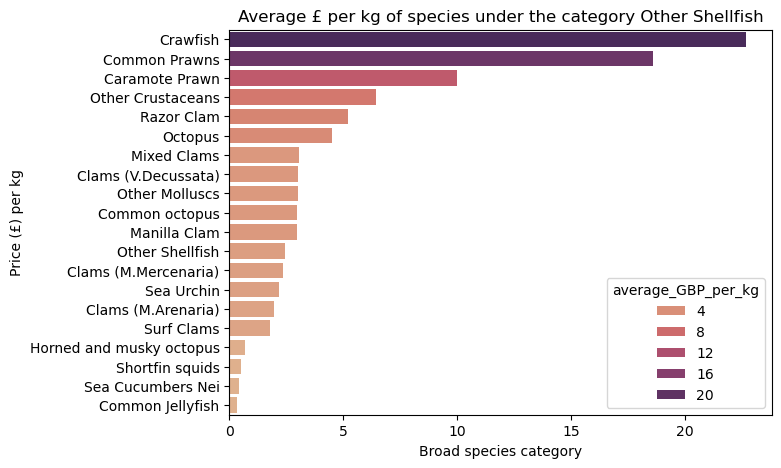

<Figure size 640x480 with 0 Axes>

In [30]:
# Set figure size
fig = plt.figure(figsize =(7, 5))

# Create the plot, setting the colour to change as the value changes
ax = sns.barplot(other_shellfish_sorted,  x = 'average_GBP_per_kg', y = 'species_name',hue = 'average_GBP_per_kg', palette = 'flare', legend = True, orient = 'h')
ax.set(ylabel = 'Price (£) per kg', xlabel = 'Broad species category',title = 'Average £ per kg of species under the category Other Shellfish')

# Show the plot
plt.show()
plt.clf()

_Plotting notes: as this plot showed a higher resolution of species data than previous plots, I've decided to plot them up in a different colour.  As I have far more species than other plots, I've also decided to plot this up horizontally to make the species names easier to read._

We can see that within the 'Other Shellfish' category, crawfish are by far the most expensive, at over £22/kg, far higher than lobster in the original top 10 species chart.  This category also includes two types of prawns that are the 2nd and 3rd highest most expensive species.  In an ideal world these would have been placed within the 'Shrimps and Prawns' category.  As this category was the 2nd most expensive in the original top 10 value per kg chart, this still aligns with our expectations that prawns can fetch a good price per kg.

Interestingly, I was expecting octopus to be more expensive, but there are four octopus species in the chart above (albeit the horned and musky octopus are groups togther), and they are well spread throughout the ranking.  Unsurprisingly, jellyfish are the cheapest species in this category.


##### 10 Cheapest Species
Going back a few steps to my musings around the reasoning for the disrepancies between the top 10 species by monetary value and weight, let's take a look at the 10 cheapest species.

In [31]:
bottom_10_species_pricepertonne_agg

,species_broad,total_value,average_value,total_value_000s,average_value_000s,total_weight,average_weight,average_GBP_per_tonne,average_GBP_per_kg
1,Blue Whiting,"174,096,170.40","503,168.12","174,096.17",503.17,"769,437.11","2,223.81",267.60,0.27
12,Flounder or Flukes,"812,990.40",86.23,812.99,0.09,"1,694.87",0.18,670.88,0.67
19,Horse Mackerel,"85,815,823.28","15,272.44","85,815.82",15.27,"186,425.50",33.18,707.48,0.71
44,Sprats,"15,217,510.19","18,903.74","15,217.51",18.90,"62,253.02",77.33,722.90,0.72
10,Dogfish,"8,363,246.72",403.98,"8,363.25",0.40,"23,054.93",1.11,784.42,0.78
9,Dabs,"5,979,755.47",381.29,"5,979.76",0.38,"8,805.25",0.56,835.25,0.84
46,Torsk (Tusk),"4,272,253.36","1,549.60","4,272.25",1.55,"5,199.10",1.89,892.83,0.89
30,Other Pelagic,"24,584,285.82","6,915.41","24,584.29",6.92,"29,207.53",8.22,978.54,0.98
49,Whelks,"276,327,465.62","11,833.14","276,327.47",11.83,"287,044.07",12.29,995.21,1.00
18,Herring,"659,147,703.23","76,591.65","659,147.70",76.59,"1,453,219.62",168.86,"1,017.13",1.02


This shows us that blue whiting is the cheapest species at £0.27/kg.  Whelks and herring also feature, explaining their presence on the top 10 species by weight, but absence from the top 10 species by value.

### How did price vary over time?
While the previous section gave us an average £/tonne value for across the whole dataset, I'd also like to see how the prices have varied, first just as an indicator of variance, and then secondly understanding how these variations have occurred temporally.

#### Variance
First up, I'd like to look at variation in the price, without examining how these have changed over time.  To do this, I'd like to take the 10 most expensive species, and plot them as a boxplot to see how variance for each species compares.

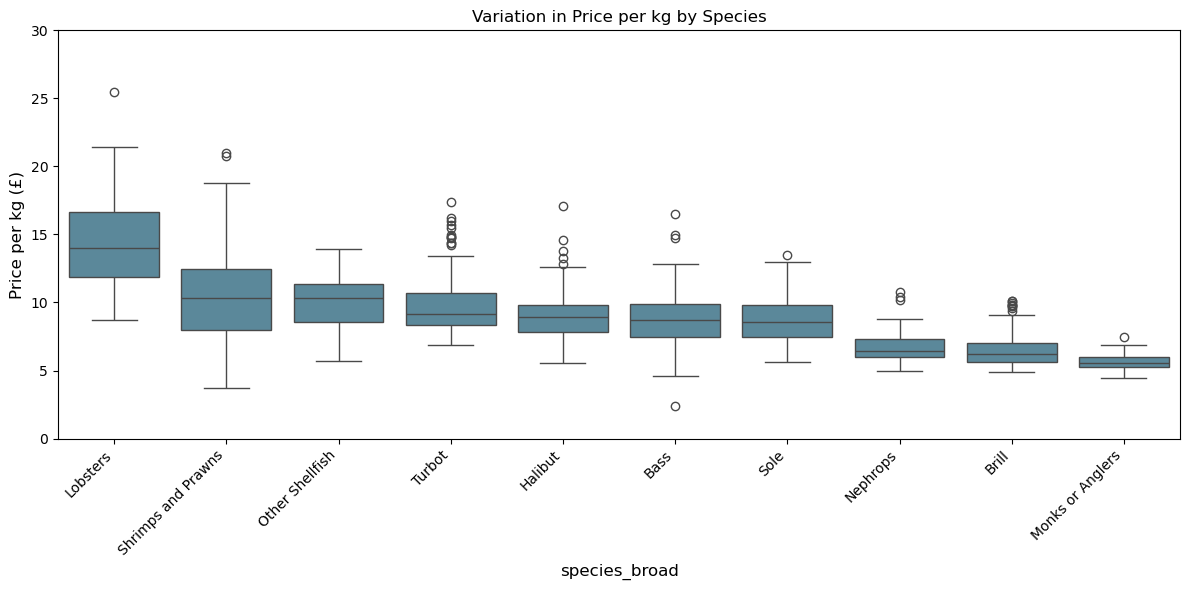

In [32]:
top_10_species_pricepertonne = all_data[all_data['species_broad'].isin(top_10_species_names_by_GBPperkg)].copy()

# Add in the price per kg column for this new dataframe
top_10_species_pricepertonne['GBP_per_tonne'] = top_10_species_pricepertonne['value'] / top_10_species_pricepertonne['weight_tonnes']
top_10_species_pricepertonne.loc[:,'GBP_per_kg'] = top_10_species_pricepertonne.loc[:,'GBP_per_tonne']/1000

monthly_GBP_per_kg = top_10_species_pricepertonne.groupby(['year','month','species_broad'])\
                        .agg({'GBP_per_kg': 'mean'}).reset_index()

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a boxplot showing variation in price per kg by species
sns.boxplot(x='species_broad', y='GBP_per_kg', data=monthly_GBP_per_kg, order = top_10_species_names_by_GBPperkg, color = '#508CA4')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set title and labels, set a ylim
plt.title('Variation in Price per kg by Species')
plt.xlabel('species_broad', fontsize=12)
plt.ylabel('Price per kg (£)', fontsize=12)
plt.ylim(0,30)

# Show the plot
plt.tight_layout()
plt.show()

We can see that the two most expensive species also show the greatest variation of the top 10 species.  Somewhat unsurprisingly, the 'Other Shellfish' had some huge outliers which I have manually excluded by setting limits on the extent of the y-axis.  It looks like generally, as the mean value per kg decreases, so does the variation in price over time.  

_Note: so far we have been discussing the average (or mean) value per kg, however the central line in a boxplot like the one above shows the value of the **median** of the dataset.  As a result, the central line differs from the values seen in the plot of top 10 species by GBP per kg above._

It's interesting to see that there's not a great deal of overlap between the top species landed by weight and the 10 most expensive species.  I'd be interested to see if there's a trend there i.e. are some species harder to source now, making them more expensive?  As an example, lobster has the highest price per tonne in the table above, but was once considered a 'poor man's protein'.  Subsequent popularity has seen many lobster fisheries decline to near collapse and the price per kilo rise dramatically.  

_Note: Ideally, to identify whether the cost of a species is influenced by stock health/status, one would run an analysis over a longer timescale and would also complete some qualitative analysis. Later in this notebook I try to see whether there is correlation between price and volume landed (see [Price Vs Volume Landed](#price-vs-volume-landed)), but the approach used has it's limitations (more specifically in terms of the length of the timeseries)._

#### Temporal Variation
Now that the price per kg for all species over the entire time period has been examined, I'd like to take a look at how this has changed over the study period.  First off, let's pull this into a pivot table to give a value per year.

In [33]:
# Create a pivot table of year vs species
annual_GBP_per_kg_pivot = species_stats_annual.pivot(columns = 'year', index = 'species_broad', values = 'average_GBP_per_kg')
# annual_GBP_per_kg_pivot

Next up, I'd like to pull out specific species and plot them up in a timeseries.  I'd like to be able to change the species that go in so I can compare and contrast.  So, I'm going to write a function that lets me choose which species go in when I'm inputting the arguments.

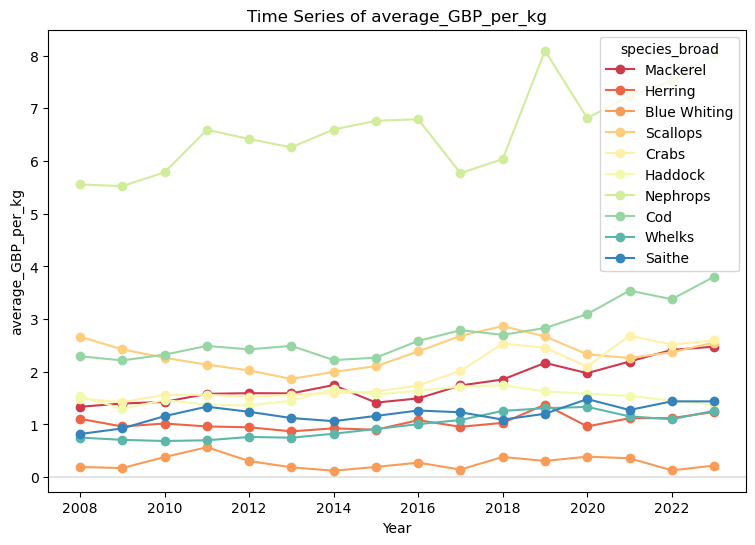

In [34]:
def plot_species_time_series(pivot_table, species_to_plot, y_parameter):
    
    # Create a colour palette
    colors = sns.color_palette("Spectral", len(species_to_plot))  # Adjust the number of colours based on the number of lines
    colour_index = 0

    plt.figure(figsize=(9, 6))
    
    # Loop through the species in the list provided and plot up each one
    for species in species_to_plot:
        if species in pivot_table.index:
            species_data = pivot_table.loc[species]
            species_data.index = species_data.index.astype(int)  # Ensure years are treated as integers
            
            plt.plot(species_data.index, species_data.values, marker='o', label=species, color = colors[colour_index])
            colour_index+=1
        else:
            print(f"Species '{species}' not found in the pivot table.")
    
    # Set the labels, title & legend
    plt.xlabel('Year')
    plt.ylabel(f"{(y_parameter)}")
    plt.title(f"Time Series of {(y_parameter)}")
    plt.axhline(y = 0, color = 'grey', linewidth = 0.3)
    plt.legend(title="species_broad")
    
    # Show the plot
    plt.show()

plot_species_time_series(annual_GBP_per_kg_pivot,species_weight_top_10_list,'average_GBP_per_kg')

Above, we have the price per kg of the top 10 species caught by weight.  We can see that nephrops is both much higher in price than the other species and also a lot more variable between years.  It looks like the remaining nine species are mostly sliwly increasing over time, with the exception of blue whiting.  To make this a bit clearer to see, I'm going to plot up a timeseries of the difference in price for each year from the 2008 value.

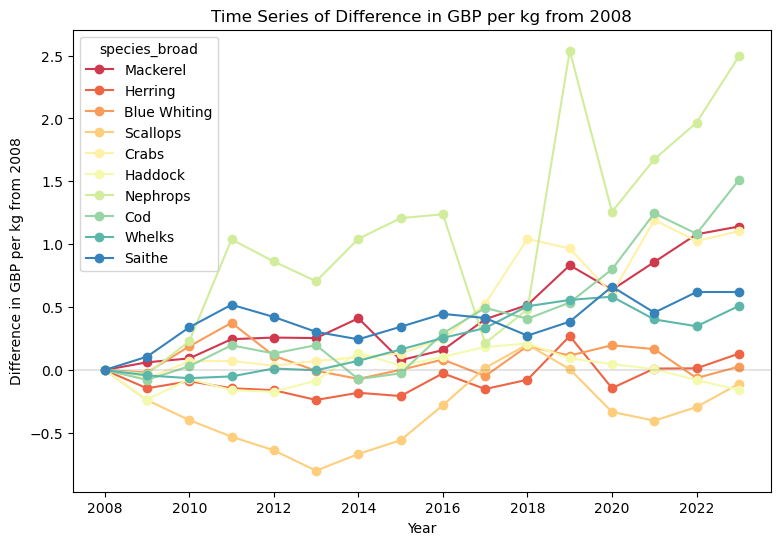

In [35]:
# Create a pivot table of the differences in values from 2008
pivot_table_diff_value = annual_GBP_per_kg_pivot.sub(annual_GBP_per_kg_pivot.iloc[:, 0], axis=0)
pivot_table_diff_value.iloc[:, 0] = 0 # Set the first column to 0

plot_species_time_series(pivot_table_diff_value,species_weight_top_10_list,'Difference in GBP per kg from 2008')

This plot shows us that the majority of species have increased in price over the study period except scallops and haddock.  I haven't accomodated for inflation in this analysis, so this shows decreases in value despite that.  While I thought from the previous graph that blue whiting had decreased in price, this chart shows that it has, in fact, remained fairly consistent over the study period.

Nephrops had the greatest overall increase in value but is highly variable, so this could well change in future years.  In terms of more species showing more consistent price changes, cod showed the next largest increase of around £1.50/kg, followed by mackerel and crab at around £1.00/kg.

### How did landings change over time?
Next up, I'd like to have a look at the top 10 species by weight and see how these have changed over the study period.  I'm going to take a look at how these changed inter-annually and following that, I'll take a look at how the landings varied across each year to get an idea of seasonality.

#### Inter-annual variability
Firstly, let's create a pivot table that looks at the weight landed each year for each species.


In [36]:
yearly_agg_weight_pivot = species_stats_annual.pivot(columns = 'year', index = 'species_broad', values = 'total_weight')

Next, let's use the function created earlier to plot up how the weight over time has varied.

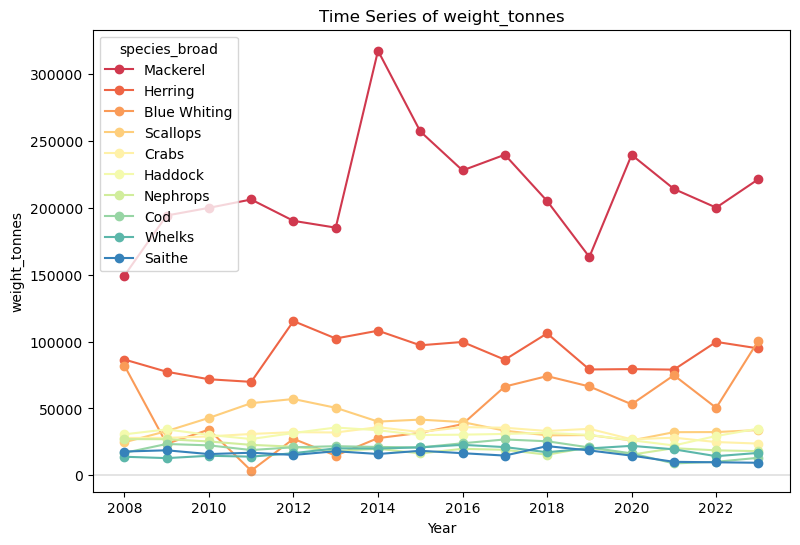

In [37]:
plot_species_time_series(yearly_agg_weight_pivot,species_weight_top_10_list,'weight_tonnes')

As expected, mackerel is much higher than the other species.  So let's take a look at the same plot but without mackerel to see if it shows up any trends that are harder to see at this scale.

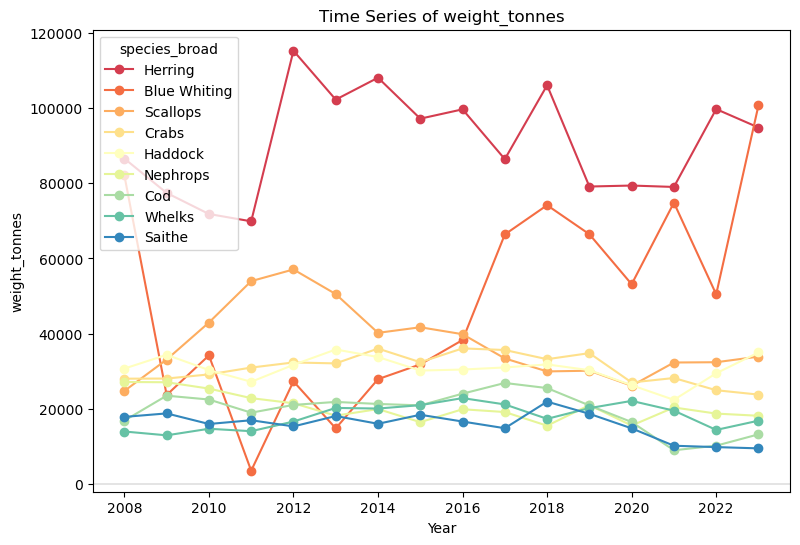

In [38]:
species_weight_top_10_list_no_mack = ['Herring', 'Blue Whiting','Scallops','Crabs','Haddock','Nephrops','Cod','Whelks','Saithe']

plot_species_time_series(yearly_agg_weight_pivot,species_weight_top_10_list_no_mack,'weight_tonnes')

I can see that there are three key species that have shown greater variation over the time series: herring, blue whiting and scallops. 

In 2011, blue whiting saw a substantial decrease in catches.  This was caused by widespread concern over the health of the blue whiting stock which saw the quota for that year set to 40,100 tonnes (a quota is like a cap on the amount of fish that should be removed in a given year).  Despite this capping, in 2011 the actual amount of blue whiting landed exceeded the quota by 100%.  The next year, the quota was drastically increased to over 300,000 tonnes.  This year of heavily restricted fishing is certainly easily observed in the chart above.

The others appear more steady but I feel that there is potentially a slight decline over the time series that is hard to pick out in this format.  I'd like to take those species that are showing less variation and calculate the difference from the first year to make this clearer.  

After identifying the species of interest, I need to create a new time series that instead of having the absolute value of landings for that year, is actually the difference from the first 2008 value.

In [39]:
# Subtract the values of the first column from subsequent column values
pivot_table_diff = yearly_agg_weight_pivot.sub(yearly_agg_weight_pivot.iloc[:, 0], axis=0)

pivot_table_diff.iloc[:, 0] = 0  # Set the first column values to 0


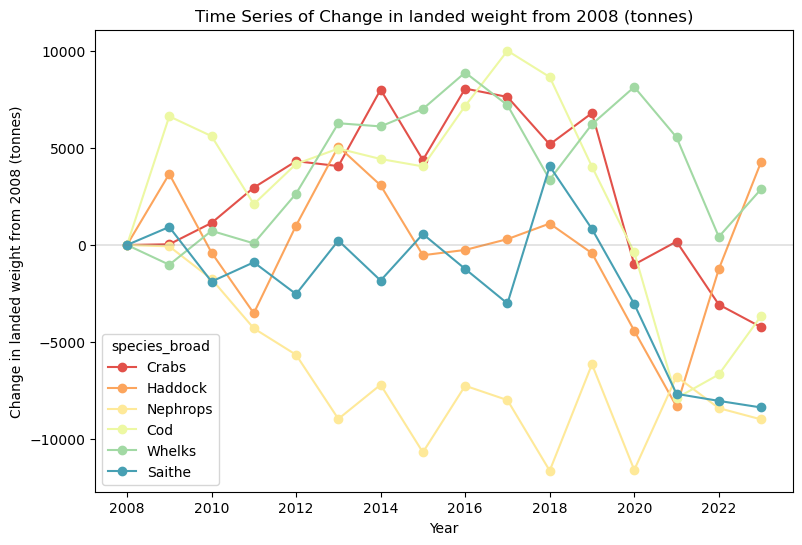

In [40]:
# Assign the species of interest and plot up
small_variation_species = ['Crabs', 'Haddock', 'Nephrops', 'Cod', 'Whelks', 'Saithe']
plot_species_time_series(pivot_table_diff,small_variation_species,'Change in landed weight from 2008 (tonnes)')

Overall, four of the species (crabs, cod, saithe and nephrops) had lower landings than 2008, while two (haddock and whelks) had higher landings in 2023 than 2008.

From this graph, it looks like landings went down for most species in 2020 with the exception of whelks which seemed to continue as normal despite the pandemic.  It's interesting to see that whelk landings didn't seem to get impacted quite so much.  

The species with the greatest overall drop in landings was nephrops, which showed consistently lower landings through the study period.  Conversely, haddock showed the greatest overall increase in landings, although was highly variable throughout the study period.  

_Note: This difference plot only compares to one value (the 2008 landings value) and I have no indication of whether 2008 was a 'normal' year and therefore is a reliable baseline to use.  As a result I'm purely taking this graph at face value, and wouldn't make any serious inferences from it.  For these purposes, where I'm just looking to get a rough idea of the change since 2008 (and I'm not making any policy decisions based on this graph) I'm happy to take this approach._

##### Price vs Volume Landed
I previously spoke about whether landing volumes might impact the price per kg of different species.  To understand whether there is correlation between the two variables, I'm going to create a cross-correlation plot for landed weight and price per tonne for each species.  These plots indicate whether elements of a time series are positively or negatively correlated (or conversely, whether they're independent of one another).  

A value of 1 or -1 would indicate perfect positive or negative correlation, respectively, while a value of 0 indicates no correlation at all.  Any value greater than 0.4 (or -0.4) shows a moderate correlation.  I have set yellow highlighting to occur where the value is over 0.4, and green highlighting where it is under -0.4.

_Note: It is said often but bears repeating - correlation does not mean causation, and it's best to take the correlations shown in the graphs at face value without assuming they influence one another.  This would be better confirmed with further qualitative analysis such as interviews etc._

In [41]:
# Combine the year and month into one column, then set 'date' as the index for time series analysis
species_stats_monthly['date'] = pd.to_datetime(species_stats_monthly[['year', 'month']].assign(DAY=1))
species_stats_monthly = species_stats_monthly.set_index('date')

# Create a function that generates a series of cross correlation plots to compare for different species
def cross_correlation_lag_plot(dataframe_name, species_list, nrows=2, ncols=5):
    
    # Create a figure with subplots
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
    axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

    for i, species_name in enumerate(species_list):
        # Check if we exceed the number of subplots
        if i >= len(axs):
            print(f"Warning: Too many species requested ({len(species_list)}), only plotting {len(axs)}.")
            break

        # Isolate the species of interest from the dataframe
        species_data = dataframe_name[dataframe_name['species_broad'] == species_name]

        # Ensure data for specific species is sorted by date
        species_data = species_data.sort_index()

        # Extract the relevant columns
        landed_weight = species_data['total_weight'].values
        GBP_per_tonne = species_data['average_GBP_per_tonne'].values

        # Standardise the data
        landed_weight_standardised = (landed_weight - np.mean(landed_weight)) / np.std(landed_weight)
        GBP_per_tonne_standardised = (GBP_per_tonne - np.mean(GBP_per_tonne)) / np.std(GBP_per_tonne)

        # Compute cross-correlation with lags using standardised values
        cross_corr_with_lags = np.correlate(landed_weight_standardised, 
                                            GBP_per_tonne_standardised, mode='full')

        # Normalise the cross-correlation result
        cross_corr_with_lags /= len(landed_weight_standardised)

        # Create the lag values
        lags = np.arange(-len(species_data) + 1, len(species_data))

        # Plotting
        ax = axs[i]  # Select the current subplot
        ax.plot(lags, cross_corr_with_lags)
        ax.set_title(f"{species_name}")
        ax.set_xlabel("Lag (number of months)")
        ax.set_ylabel("Standardised Cross-correlation")

        # Add vertical grey lines at 12-month intervals
        for lag in range(-len(species_data), len(species_data), 12):
            ax.axvline(x=lag, color='grey', linestyle='--', linewidth=0.7)
        
        ax.axhline(y = 0, color = 'grey', linewidth = 0.3)

        # Highlight areas where correlation is greater than thresholds
        threshold = 0.4
        negative_threshold = -0.4
        ax.fill_between(lags, 0, 1, where=cross_corr_with_lags > threshold, color='green', alpha=0.5, transform=ax.get_xaxis_transform())  
        ax.fill_between(lags, 0, 1, where=cross_corr_with_lags < negative_threshold, color='orange', alpha=0.5, transform=ax.get_xaxis_transform())

        # Set the x and y axis limits (the x to limit to 5 years either side, and the y to ensure plots are comparable to one another)
        ax.set_xlim(-60, 60)
        ax.set_ylim(-0.68, 0.68)

    plt.tight_layout()  # Adjusts subplot params for better spacing
    plt.show()
    plt.clf()

First up, let's plot the top 10 species by landed weight.

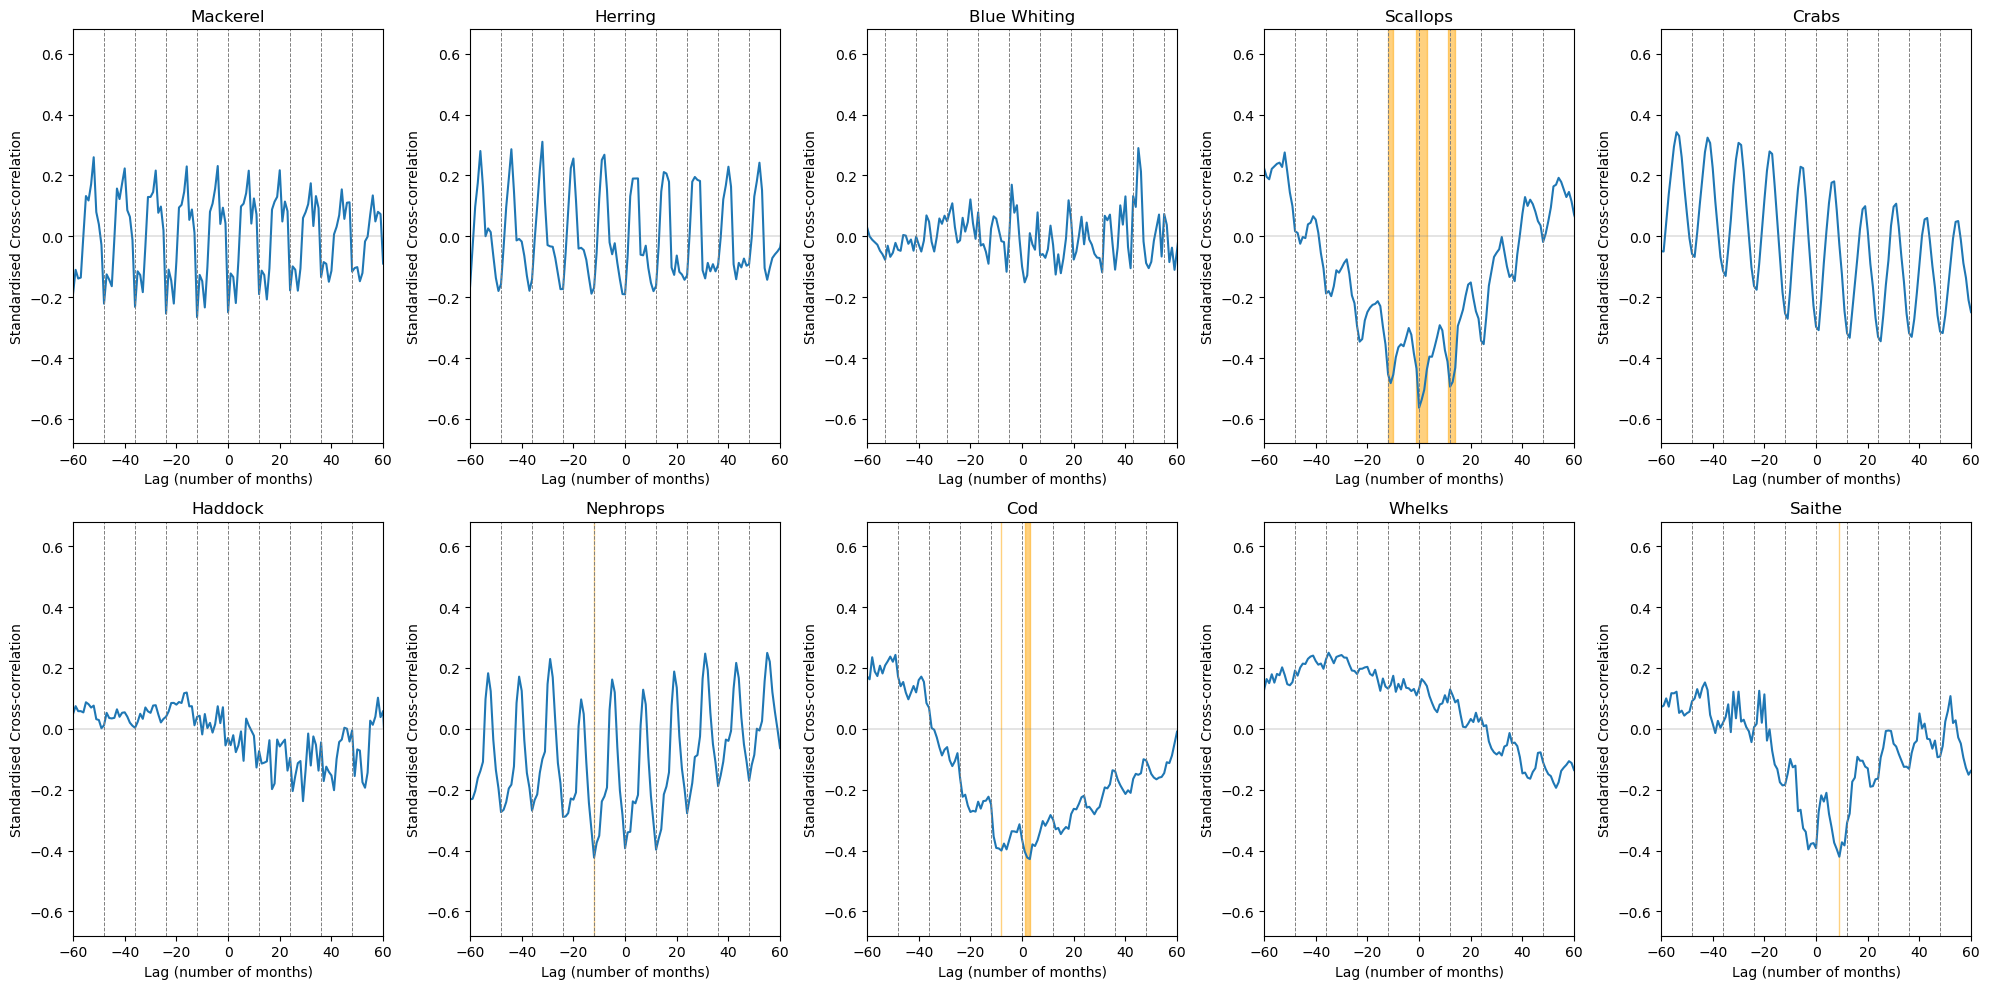

<Figure size 640x480 with 0 Axes>

In [42]:
cross_correlation_lag_plot(species_stats_monthly, species_weight_top_10_list, nrows=2, ncols=5)

The species show substantial differences in the patterns of cross-correlation observed in the above plot.  While several species have a distinctly annual nature (the grey dashed lines indicate 1 year), such as mackerel and herring, other species have very little identifiable pattern (like haddock and blue whiting).

The majority of species don't have any cross-correlation values of greater than ±0.4.  The exceptions to this were scallops, cod and (very briefly) saithe (AKA pollock).  The pattern observed in scallops appears to be cyclical on a roughly annual basis, one year either side of a lag of 0.  

The cross-correlation value being negative indicates a potential correlation between a decreased landing volume and an increase in price (and vice versa).  This would tie in with my theory that lower landings could push the price up, but it is important to remember the correlation does not mean causation note from above.

Now let's try again with the top ten species by value.

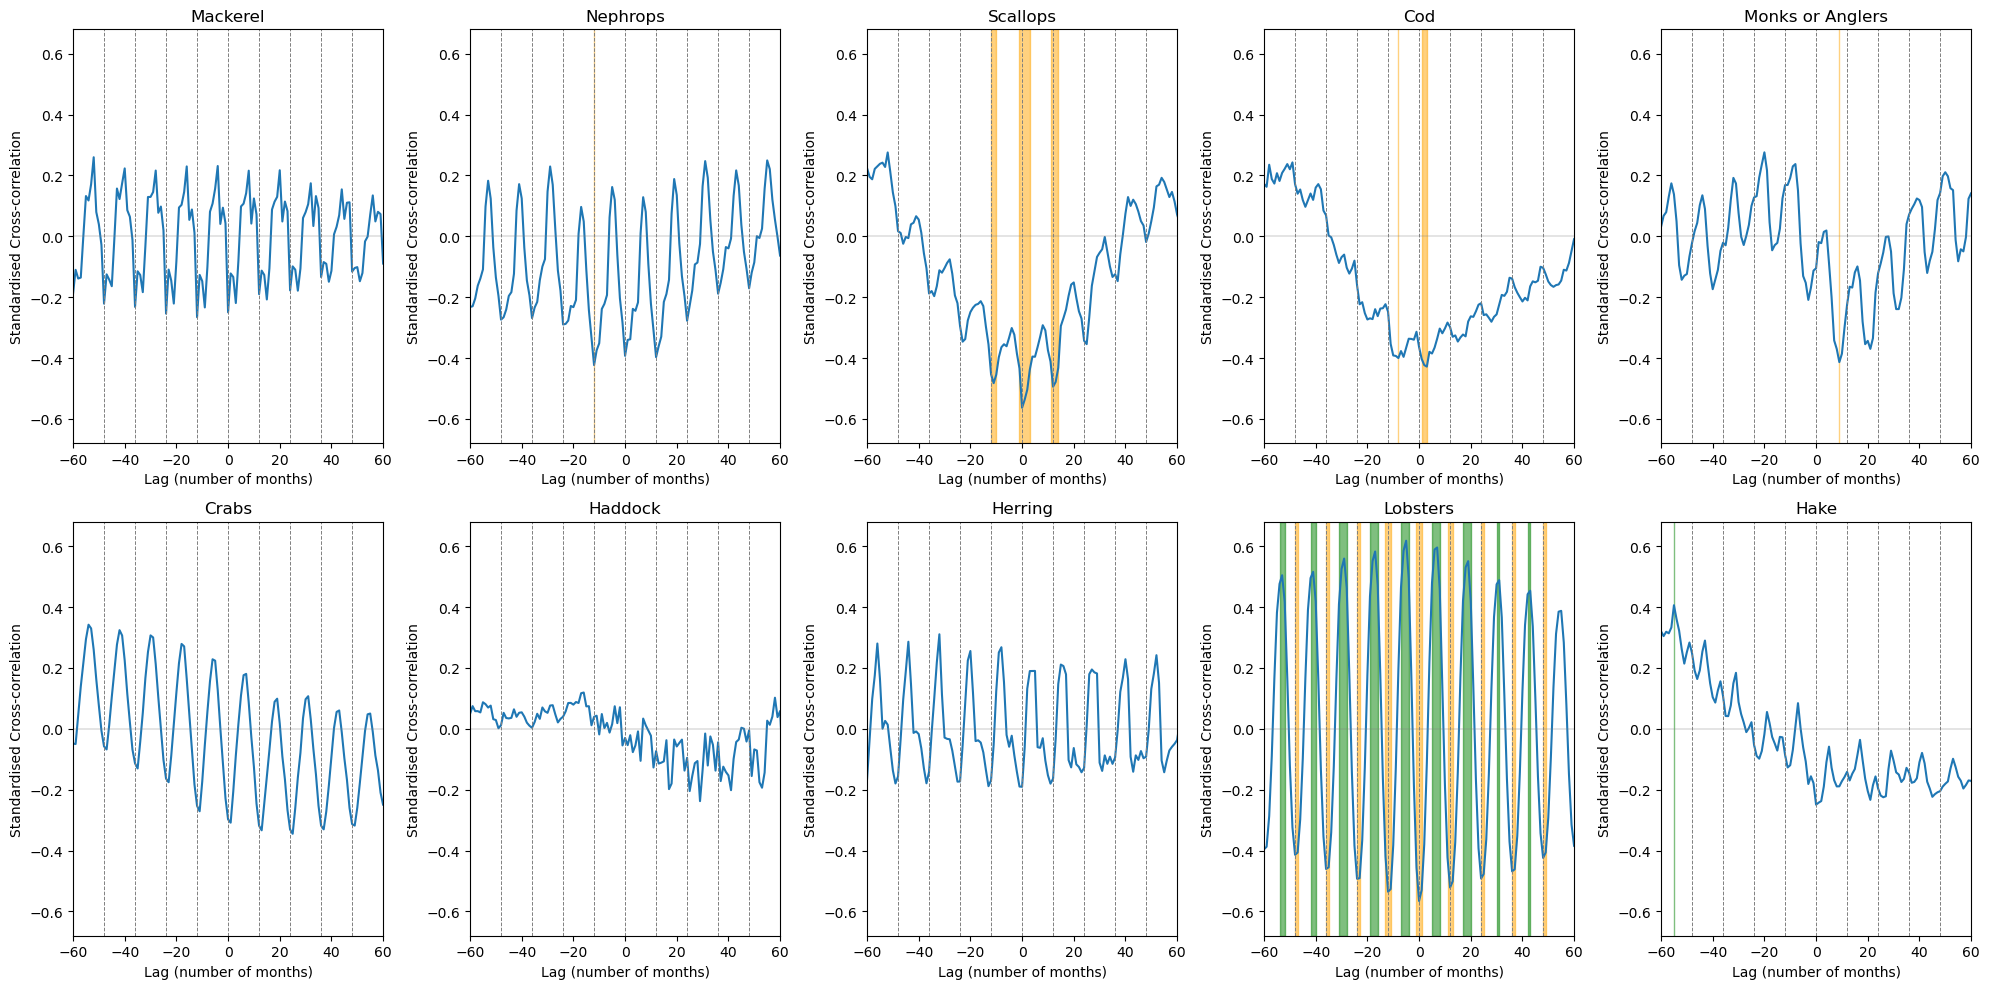

<Figure size 640x480 with 0 Axes>

In [43]:
cross_correlation_lag_plot(species_stats_monthly, species_value_top_10_list, nrows=2, ncols=5)    

Much like the previous set of 10 species, the majority of species do not show significant cross-correlation values.  However, for this plot, lobster shows a very interesting pattern of both negative and positive correlation.  Specifically, we can see negative correlation on a 12 month cycle, and a positive correlation on a similar 12 month cycle offset by six months.  What this tells us is that at the time of catch going down, there is a moderate correlation with prices rising (subsequently annually), and that there is a 6 month lag behind larger catches and higher prices.  

Given this pattern is seen to extend across multiple years, I find it likely that this might have something to do with seasonal variation in catches and popularity.  So let's examine that a bit closer after looking at seasonal variability.

#### Seasonal Variability
To examine seasonal variability, I'm going to take a look at the top 10 species by weight and monetary value.  This is once again something that could have been interesting to look at with a longer dataset, as this could show changes in seasonality influenced by climate change.  Despite this, it will be interesting to note whether there are any observable shifts in species seasonality.

In [44]:
def species_heatmap(dataframe_name,species_list,nrows=2, ncols=5):
    
    # Create a figure with subplots
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10))
    axs = axs.flatten()  # Flatten the 2D array of axes to 1D for easy indexing

    for i, species_name in enumerate(species_list):
        # Check if we exceed the number of subplots
        if i >= len(axs):
            print(f"Warning: Too many species requested ({len(species_list)}), only plotting {len(axs)}.")
            break

        # Isolate the species of interest from the dataframe
        species_data = dataframe_name[dataframe_name['species_broad'] == species_name]

        # Create a pivot table
        landings_month_year = species_data.pivot_table(index='year', columns='month', values='total_weight', aggfunc='sum')

        # Plotting
        ax = axs[i]  # Select the current subplot
        sns.heatmap(landings_month_year, ax=ax, cmap = 'flare',cbar_kws={'label': 'total_weight'})
        ax.set_title(f'{species_name} Landings Heatmap')

    plt.tight_layout()  # Adjusts subplot params for better spacing
    plt.show()
    plt.clf()


First up, let's take a look at the top 10 species by weight.

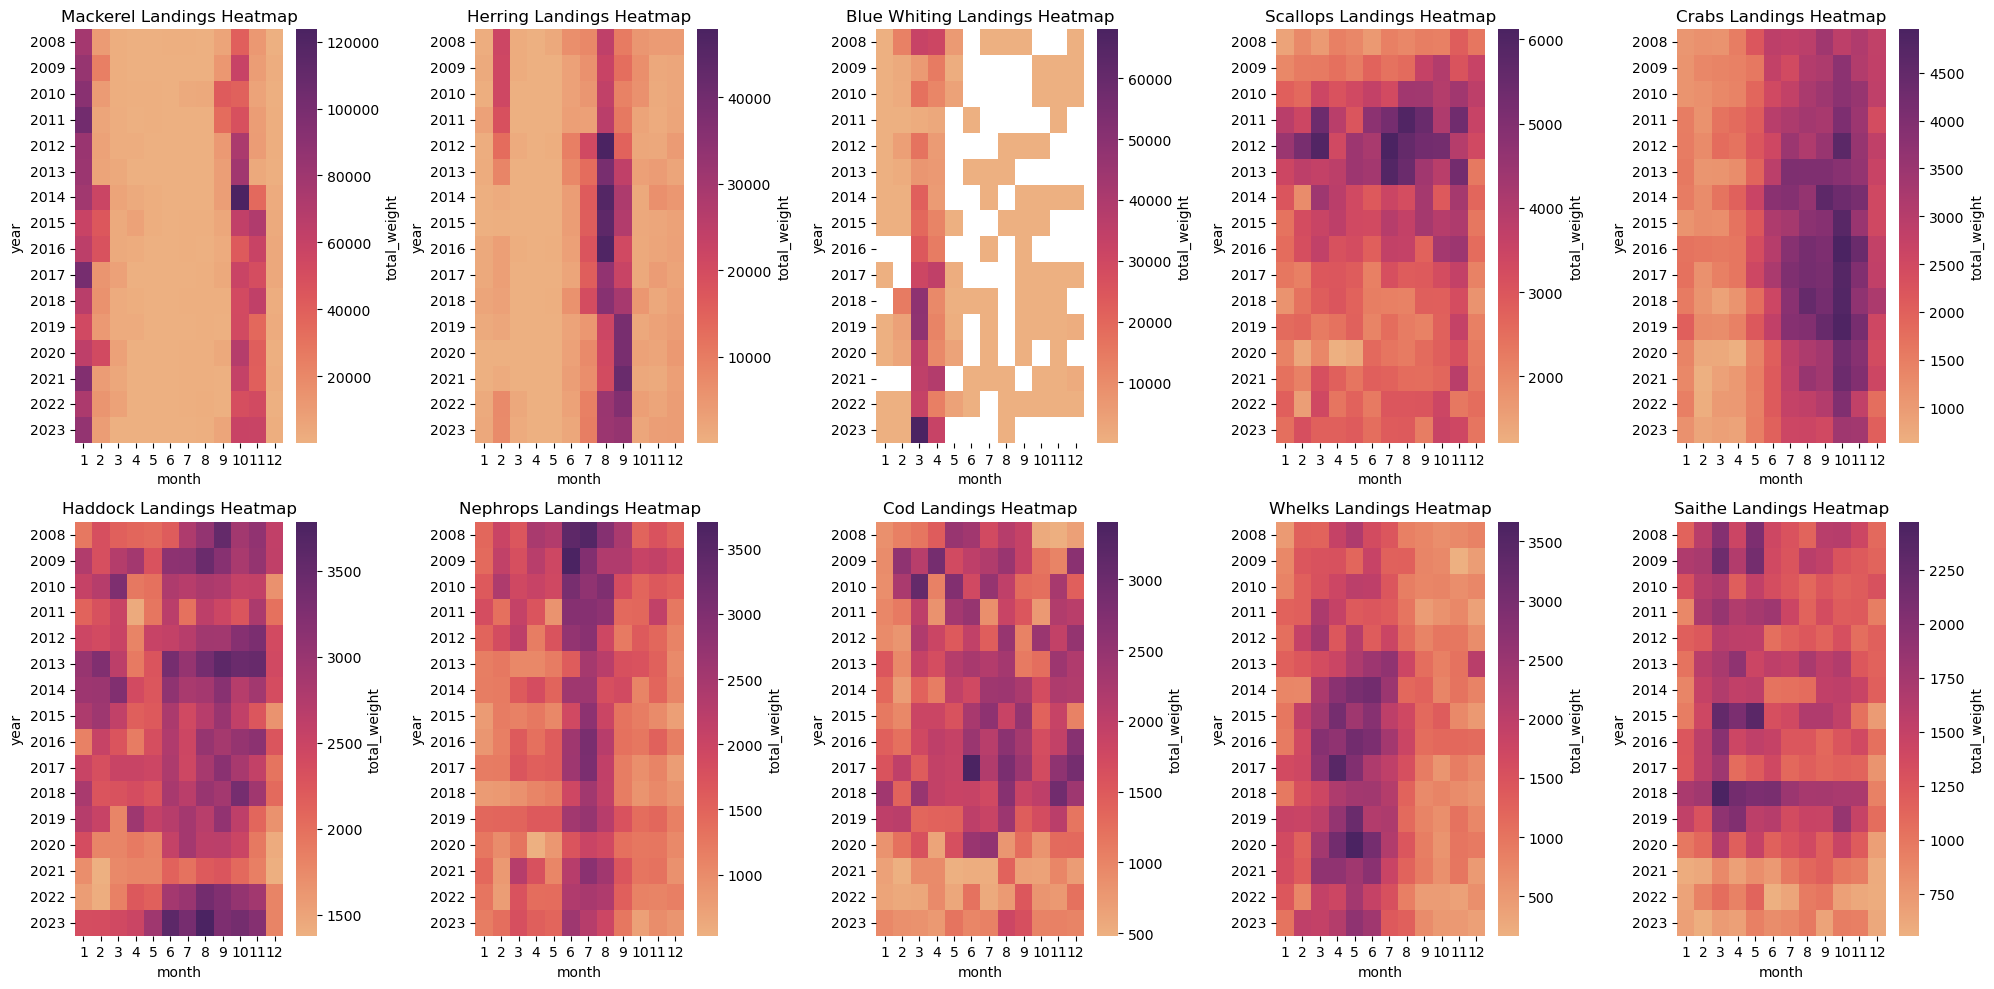

<Figure size 640x480 with 0 Axes>

In [45]:
species_heatmap(species_stats_monthly,species_weight_top_10_list, nrows=2, ncols=5)

Here we can see quite a bit of variability between species in terms of both seasonality _and_ inter-annual changes.  For example, while mackerel and herring clearly show very well-defined seasons, saithe and cod show more consistent landings throughout the year.  However, for these latter two species, we can also see lighter colours in the last three years, indicating lower landings.

Similarly, we can see that scallops had had greater landings from 2011-2013, but following that period, levels have returned to those seen previously.  

This plot also helps to demonstrate nicely the distribution of the seasons of various species throughout the year, explaining why fishermen often have gear for multiple species, allowing them to make the most of a given season throughout the year.

While I previously mentioned that a longer time series would be ideal to capture changes from factors such as climate change, there does appear to be a slight shift in the seasons mackerel and herring to later in the year.  The addition of more years of data would help to clarify whether this is part of a longer-term trend and perhaps identify it more clearly.

Next up, let's take a look at the same plots for the top 10 species by monetary value.

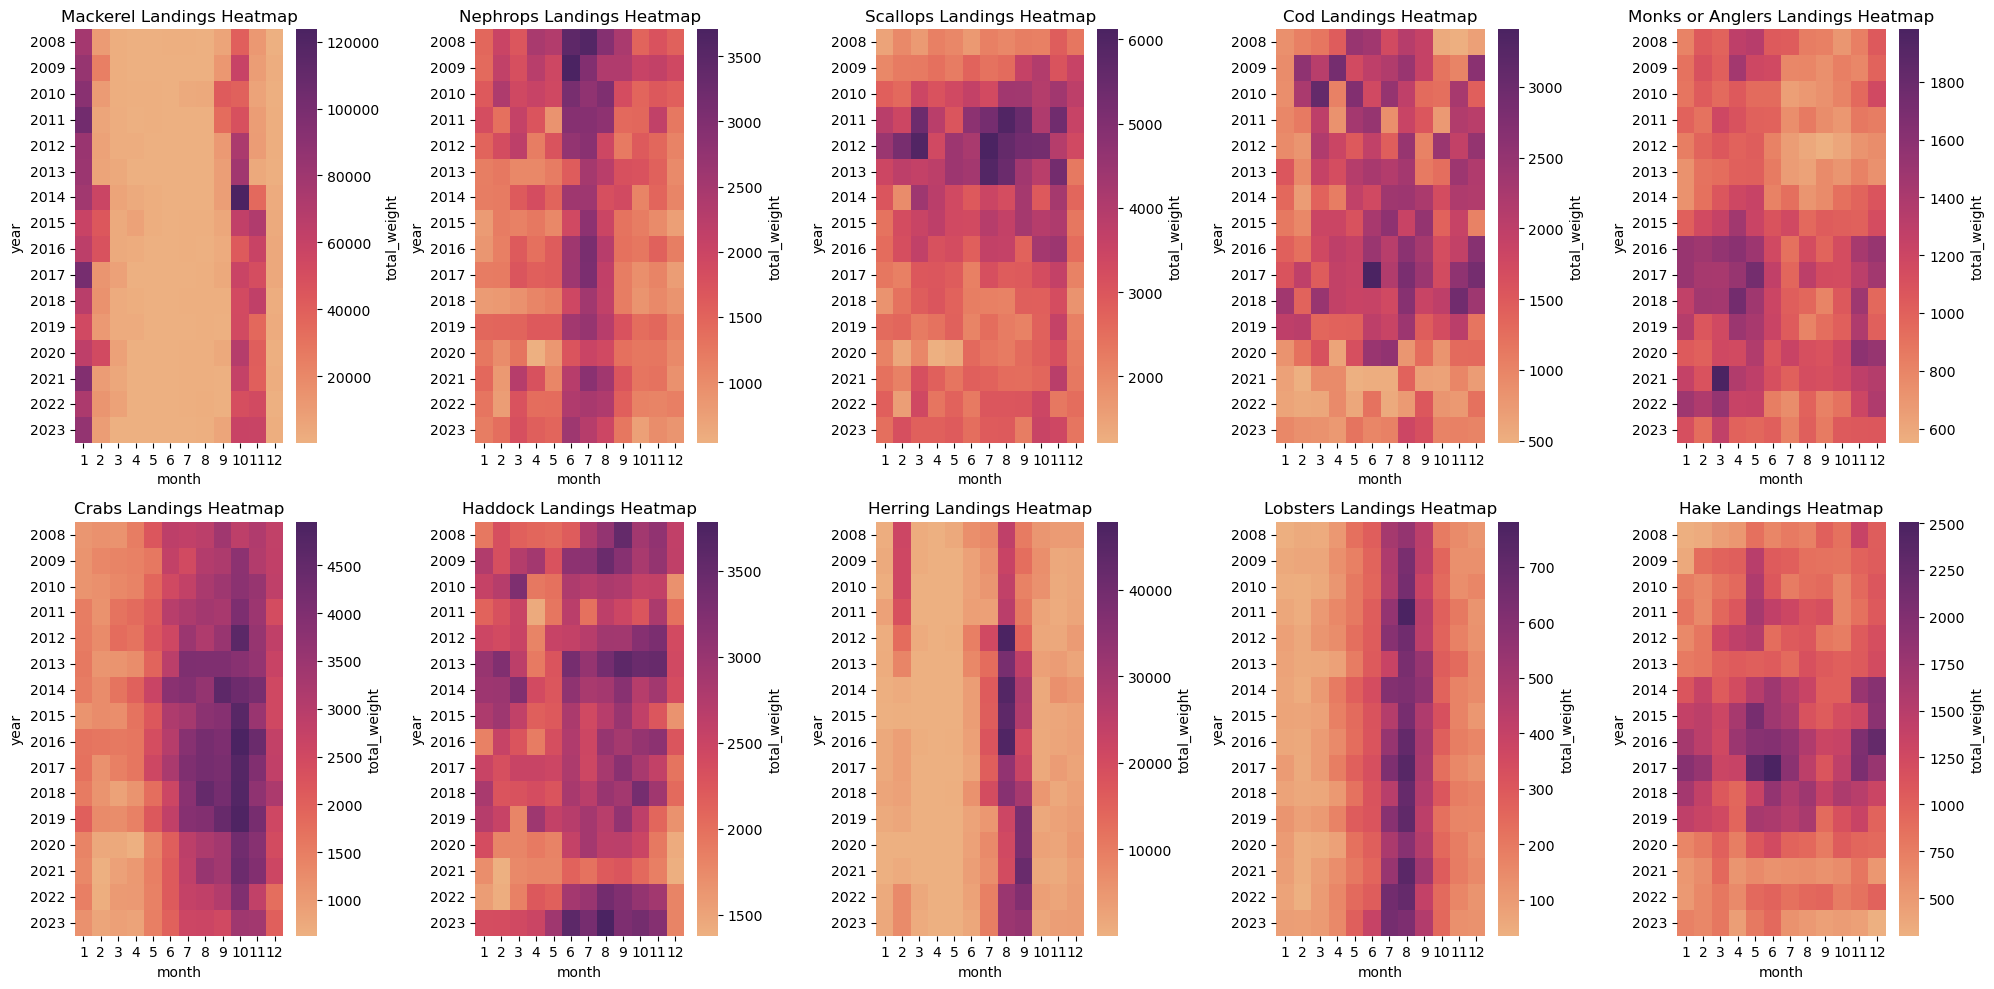

<Figure size 640x480 with 0 Axes>

In [46]:
species_heatmap(species_stats_monthly,species_value_top_10_list, nrows=2, ncols=5)

The only three species on here that are different are monks & anglers, lobsters and hake.  Monks and anglers don't seem to show a particularly strong seasonality, with only a slight peak around April & May.  

Similarly, hake does not show obvious seasonality, yet both of these species show periods of years where landings appear to have increased for a while.  For monks & anglers, this was 2016-2022, and for hake this was slightly earlier, during 2014-2019.  In recent years, both species, much like scallops, are showing a return to levels similar to those seen previously.  

Lobsters tell an altogether different story.  There is a very clear seasonality to lobster landings, with a peak around July and August.  To examine this, and the correlation between lobster landings and lobster price, I'd like to plot these two variables as heatmaps aligned with one another to more easily compare.

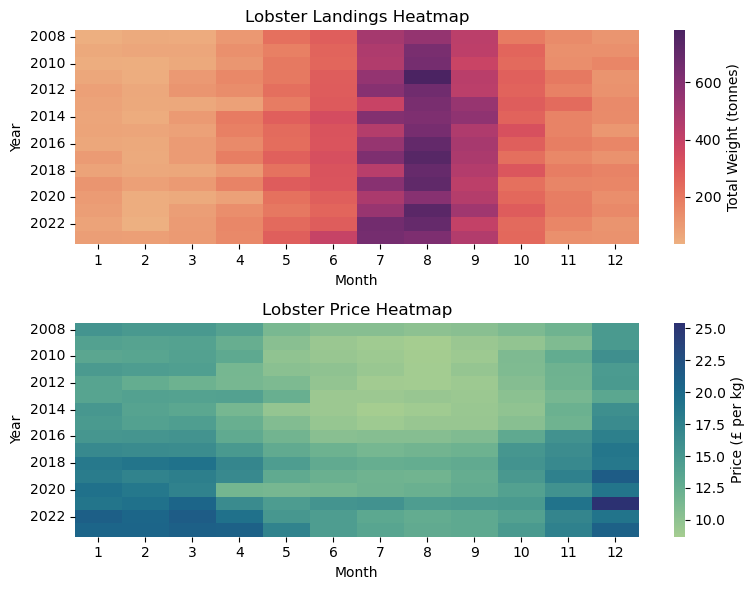

<Figure size 640x480 with 0 Axes>

In [47]:
# Lobster price testing
lobster_monthly = species_stats_monthly[species_stats_monthly['species_broad'] == 'Lobsters'].copy()

# Combine the year and month into one column, then set 'date' as the index for time series analysis
lobster_monthly['date'] = pd.to_datetime(lobster_monthly[['year', 'month']].assign(DAY=1))
lobster_monthly = lobster_monthly.set_index('date')

price_month_year = lobster_monthly.pivot_table(index='year', columns='month', values='average_GBP_per_kg')
landings_month_year = lobster_monthly.pivot_table(index='year', columns='month', values='total_weight')

# Create subplots for heatmaps
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

# Heatmap for lobster landings
sns.heatmap(landings_month_year, ax=axs[0], cmap='flare', cbar_kws={'label': 'Total Weight (tonnes)'})
axs[0].set_title('Lobster Landings Heatmap')
axs[0].set_xlabel('Month')  # X-axis label for the first subplot
axs[0].set_ylabel('Year') 

# Heatmap for lobster price
sns.heatmap(price_month_year, ax=axs[1], cmap='crest', cbar_kws={'label': 'Price (£ per kg)'})
axs[1].set_title('Lobster Price Heatmap')
axs[1].set_xlabel('Month')  # X-axis label for the first subplot
axs[1].set_ylabel('Year') 

# Adjust the layout for better display
plt.tight_layout()
plt.show()
plt.clf()


We can see that for every year of the study period, the price of lobster dips at the same time as the landings peak, around August.  Conversely in the winter months, we can see a clear increase in price in December, with prices remaining elevated until the following spring.

Thanks to these heatmaps, we're getting a much clearer picture of why the lobster cross correlation plot had that very distinct pattern!

## Conclusion

### Findings overview
- Of the three species groups (pelagic, demersal and shellfish), pelagic species take up 57% of the total landings by weight.
- When comparing the same groups by monetary value, the same species comprise approximately half the value, at 29%.  This is thought to be influenced by the species in this group (such as blue whiting) that are caught in huge volumes but sold at low prices for fish oil and bait.
- Mackerel plays a huge role in the UK fishery. £3 billion of mackerel was landed over the study period, making up over 20% of the total value.
- Lobster was the most expensive seafood over the study period, but other individual species in other 'species_broad' categories (which comprise several species) were more expensive than this.  Lobster also showed substantial seasonal variation in both landings and the price, a pattern that remained consistent throughout the study period.
- Within the top 10 most expensive species, there was a trend towards higher average prices also having greater variance in price.
- The top 10 species landed by weight almost invariably showed an increase in price over the study period, with the exception of haddock and scallops (despite not accounting for inflation).
- Species tend to vary quite substantially in terms of their seasonality.  For example, species such as saithe and haddock have no obvious seasonal landings pattern, whereas mackerel, herring and lobster show very strong seasonal changes.  
- Mackerel and herring also appeared to show small shifts in their seasonality to later in the year, raising the question as to whether this is caused by climate change.
- Overall, I was interested to not see more of an obvious change in 2020 during the pandemic.  While there were some small dips, there was not a glaringly obvious change in the parameters examined.

### Further Analysis
There's always more work to do, so below I have listed some of the further exploration that could be done which became apparent during analysis:

- It would very useful to see the same monthly data extending back to the beginning of the overall dataset.  While data goes all the way back to the early 1900s, not all of it has been digitised and much of it is in an unreadable pdf format.  A longer dataset would allow for a view of how stocks have been affected by two of the key impacts on our fishery - overfishing and climate change.  Older data would also allow for a better understanding of seasonal changes than the 16 years used in this dataset.
- I haven't accounted for inflation in this analysis which will have influenced the plots looking at value and price.  Further analysis could take into account inflation rates between years and normalise values to this.  Doing this may show that relative to inflation, certain species are getting cheaper or a lower value is being landed.
- I only ran this on the top 10 species in terms of weight and value landed, but this could be run for other species of interest.  For example, if a species had substantially different landings from the beginning of the study period to the end.  Alternatively, if one was feeling really brave, they could try and take a look at all species listed.
- Finally, I primarily looked at the differences between species at the level of 'species_broad'.  If one was interested in a particular species_broad category, they could do further analysis to differentiate between species.

## Sources and other useful information

### Fisheries data:
2008-2019: https://data.europa.eu/data/datasets/united-kingdom-fleet-landings-and-foreign-fleet-landings-into-the-uk-by-port-2011?locale=da

2020: https://www.gov.uk/government/statistics/uk-sea-fisheries-annual-statistics-report-2020 

2021: https://www.gov.uk/government/publications/uk-and-foreign-vessels-landings-by-uk-port-and-uk-vessel-landings-abroad-provisional-data

2022: https://www.gov.uk/government/publications/2022-uk-and-foreign-vessels-landings-by-uk-port-and-uk-vessel-landings-abroad-provisional-data

2023: https://www.gov.uk/government/publications/2023-uk-and-foreign-vessels-landings-by-uk-port-and-uk-vessel-landings-abroad-provisional-data


### Other useful links:
* Effort statistics (MMO): https://www.gov.uk/government/statistical-data-sets/effort-statistics-august-2015
* Landings 1999-2003 (Eng, Wales and NI): https://webarchive.nationalarchives.gov.uk/ukgwa/20090617065827/https://statistics.defra.gov.uk/esg/publications/fishports/default.asp


### Other useful references:
* "As early as 1863, complaints about the declining condition of demersal fish stocks (mainly nearshore) led to a Royal Commission of Enquiry into fisheries" from https://www.nature.com/articles/ncomms1013#:~:text=Throughout%20the%20118%2Dyear%20time,and%20in%201955%20landed%2091%25.
* Source of the 'big five' species that make up 80% of UK's consumed seafood: https://www.mcsuk.org/ocean-emergency/sustainable-seafood/seafood-buying-guides/5-sustainable-seafood-swaps/

* Coolors palette: https://coolors.co/bfd7ea-a8c3d6-91aec1-719db3-508ca4

# Old code - delete before publishing

In [48]:
# # Merge the two dataframes that contain total and average weight and value for each species into one dataframe
# allyears_agg = allyears_agg_value.merge(allyears_agg_weight)

# # Add a new column that gives the price per tonne
# allyears_agg['GBP_per_tonne'] = allyears_agg['total_value'] / allyears_agg['total_weight']

# Sort the data to be in order of descending price per tonne
# sorted_allyears_agg_GBPpertonne = stats_by_species.sort_values(by = 'GBP_per_tonne', ascending = False)
# sorted_allyears_agg_GBPpertonne

# SEE NEXT CODE CELL AS THIS GOT MOVED AROUND A LOT

/var/folders/hl/n0654x5j7dd12gd927mvx03r0000gn/T/ipykernel_3730/1883235149.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mackerel_monthly['date'] = pd.to_datetime(mackerel_monthly[['year', 'month']].assign(DAY=1))


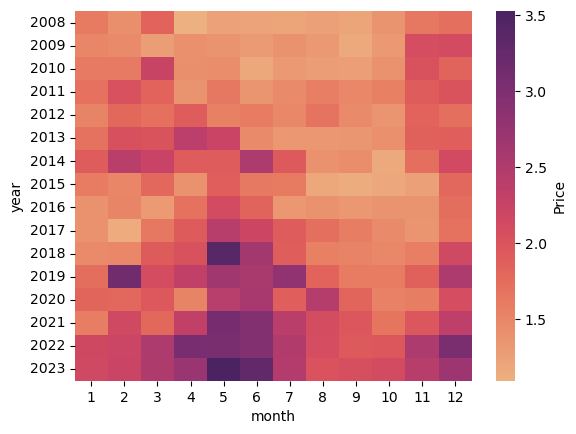

<Figure size 640x480 with 0 Axes>

In [49]:
# Mackerel price testing
mackerel_monthly = species_stats_monthly[species_stats_monthly['species_broad'] == 'Mackerel']

# Combine the year and month into one column, then set 'date' as the index for time series analysis
mackerel_monthly['date'] = pd.to_datetime(mackerel_monthly[['year', 'month']].assign(DAY=1))
mackerel_monthly = mackerel_monthly.set_index('date')

landings_month_year = mackerel_monthly.pivot_table(index='year', columns='month', values='average_GBP_per_kg')

# Plotting
# Select the current subplot
sns.heatmap(landings_month_year, cmap = 'flare',cbar_kws={'label': 'Price'})
ax.set_title('Mackerel Price')
plt.show()
plt.clf()

/var/folders/hl/n0654x5j7dd12gd927mvx03r0000gn/T/ipykernel_3730/1348369750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  haddock_monthly['date'] = pd.to_datetime(haddock_monthly[['year', 'month']].assign(DAY=1))


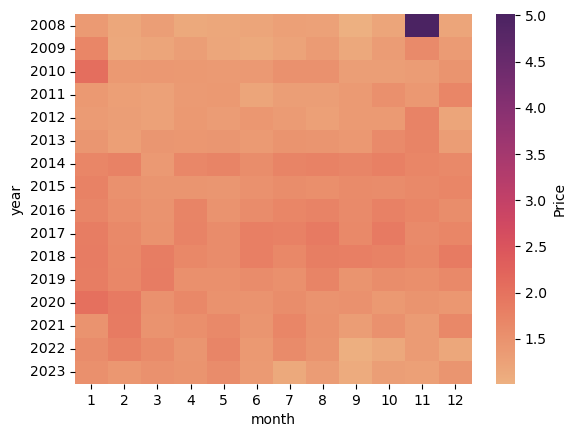

<Figure size 640x480 with 0 Axes>

In [50]:
# Haddock price testing
haddock_monthly = species_stats_monthly[species_stats_monthly['species_broad'] == 'Haddock']

# Combine the year and month into one column, then set 'date' as the index for time series analysis
haddock_monthly['date'] = pd.to_datetime(haddock_monthly[['year', 'month']].assign(DAY=1))
haddock_monthly = haddock_monthly.set_index('date')

landings_month_year = haddock_monthly.pivot_table(index='year', columns='month', values='average_GBP_per_kg')

# Plotting
# Select the current subplot
sns.heatmap(landings_month_year, cmap = 'flare',cbar_kws={'label': 'Price'})
ax.set_title('Haddock Price')
plt.show()
plt.clf()

_We can see that there is a huge amount of variation in the price per tonne of different species.  This isn't surprising, as while some species are considered delicacies, others are typically only used for bait.  For example sand eels sit right at the bottom of this table.  They are typically used for bait for other species which is reflected in their low price.  Despite this, they form a crucial part of the foodweb, being a food source for other fish and seabirds.  Luckily, in 2024, new limits were put in place to protect this important species and ensure that we are leaving enough behind for the other species that rely on them.  Despite this, there was much controversy and backlash from XXX.  But thankfully for now, the limit remains in place.  While such measures are crucial, it's also important that the types of habitats that house this species are also protected, which is why marine protected areas are also a crucial part of marine management (but that's a whole other story)._